In [17]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 4
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_new_minstable_r4_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r4.csv", delimiter=" ")

print(menor.shape)

(1013, 4)


In [18]:
def get_array(erro_list):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)/5),5)
    return erro_array

def get_array2(erro_list):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),10)
    return erro_array

def get_errors(e0,e1,e2,e3,e4,e5,e6,e7,e8,e9):
    
    mae=[np.sum(np.abs(e0),axis=0)[2]/e0.shape[0],np.sum(np.abs(e1),axis=0)[2]/e1.shape[0],np.sum(np.abs(e2),axis=0)[2]/e2.shape[0],
       np.sum(np.abs(e3),axis=0)[2]/e3.shape[0],np.sum(np.abs(e4),axis=0)[2]/e4.shape[0],np.sum(np.abs(e5),axis=0)[2]/e5.shape[0],
       np.sum(np.abs(e6),axis=0)[2]/e6.shape[0],np.sum(np.abs(e7,),axis=0)[2]/e7.shape[0],np.sum(np.abs(e8),axis=0)[2]/e8.shape[0],
       np.sum(np.abs(e9),axis=0)[2]/e9.shape[0]]
    
    mse=[np.sum(e0**2,axis=0)[2]/e0.shape[0],np.sum(e1**2,axis=0)[2]/e1.shape[0],np.sum(e2**2,axis=0)[2]/e2.shape[0],
       np.sum(e3**2,axis=0)[2]/e3.shape[0],np.sum(e4**2,axis=0)[2]/e4.shape[0],np.sum(e5**2,axis=0)[2]/e5.shape[0],
       np.sum(e6**2,axis=0)[2]/e6.shape[0],np.sum(e7**2,axis=0)[2]/e7.shape[0],np.sum(e8**2,axis=0)[2]/e8.shape[0],
       np.sum(e9**2,axis=0)[2]/e9.shape[0]]

    rmse=[np.sqrt(np.sum(e0**2,axis=0)[2]/e0.shape[0]),np.sqrt(np.sum(e1**2,axis=0)[2]/e1.shape[0]),np.sqrt(np.sum(e2**2,axis=0)[2]/e2.shape[0]),
       np.sqrt(np.sum(e3**2,axis=0)[2]/e3.shape[0]),np.sqrt(np.sum(e4**2,axis=0)[2]/e4.shape[0]),np.sqrt(np.sum(e5**2,axis=0)[2]/e5.shape[0]),
       np.sqrt(np.sum(e6**2,axis=0)[2]/e6.shape[0]),np.sqrt(np.sum(e7**2,axis=0)[2]/e7.shape[0]),np.sqrt(np.sum(e8**2,axis=0)[2]/e8.shape[0]),
       np.sqrt(np.sum(e9**2,axis=0)[2]/e9.shape[0])]
    
    return mae,mse,rmse
    

In [19]:
erro_bl0 = []
erro_bl1 = []
erro_bl2 = []
erro_bl3 = []
erro_bl4 = []
erro_bl5 = []
erro_bl6 = []
erro_bl7 = []
erro_bl8 = []
erro_bl9 = []

erro2d_bl0 = []
erro2d_bl1 = []
erro2d_bl2 = []
erro2d_bl3 = []
erro2d_bl4 = []
erro2d_bl5 = []
erro2d_bl6 = []
erro2d_bl7 = []
erro2d_bl8 = []
erro2d_bl9 = []

erro3d_bl0 = []
erro3d_bl1 = []
erro3d_bl2 = []
erro3d_bl3 = []
erro3d_bl4 = []
erro3d_bl5 = []
erro3d_bl6 = []
erro3d_bl7 = []
erro3d_bl8 = []
erro3d_bl9 = []

erro4d_bl0 = []
erro4d_bl1 = []
erro4d_bl2 = []
erro4d_bl3 = []
erro4d_bl4 = []
erro4d_bl5 = []
erro4d_bl6 = []
erro4d_bl7 = []
erro4d_bl8 = []
erro4d_bl9 = []

MAE = []
MSE = []
RMSE = []
MAE2D = []
MSE2D = []
RMSE2D = []
MAE3D = []
MSE3D = []
RMSE3D = []
MAE4D = []
MSE4D = []
RMSE4D = []


for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 1000
    future = 10
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print(i,'test error:',error)
   
    
    
    cont = np.zeros((10))
    for ii in range(future):
        
        if data[trainlen+ii] < 0.1:
            erro_bl0.append(prediction[ii][0])
            erro_bl0.append(data[trainlen+ii])
            erro_bl0.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl0.append(i)
            erro_bl0.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl0.append(prediction[ii][0])
                erro2d_bl0.append(data[trainlen+ii])
                erro2d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl0.append(i)
                erro2d_bl0.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl0.append(prediction[ii][0])
                erro3d_bl0.append(data[trainlen+ii])
                erro3d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl0.append(i)
                erro3d_bl0.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl0.append(prediction[ii][0])
                erro4d_bl0.append(data[trainlen+ii])
                erro4d_bl0.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl0.append(i)
                erro4d_bl0.append(ii)
            cont[0]+=1
        elif data[trainlen+ii] < 0.2:
            erro_bl1.append(prediction[ii][0])
            erro_bl1.append(data[trainlen+ii])
            erro_bl1.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl1.append(i)
            erro_bl1.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl1.append(prediction[ii][0])
                erro2d_bl1.append(data[trainlen+ii])
                erro2d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl1.append(i)
                erro2d_bl1.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl1.append(prediction[ii][0])
                erro3d_bl1.append(data[trainlen+ii])
                erro3d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl1.append(i)
                erro3d_bl1.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl1.append(prediction[ii][0])
                erro4d_bl1.append(data[trainlen+ii])
                erro4d_bl1.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl1.append(i)
                erro4d_bl1.append(ii)
            cont[1]+=1
        elif data[trainlen+ii] < 0.3:
            erro_bl2.append(prediction[ii][0])
            erro_bl2.append(data[trainlen+ii])
            erro_bl2.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl2.append(i)
            erro_bl2.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl2.append(prediction[ii][0])
                erro2d_bl2.append(data[trainlen+ii])
                erro2d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl2.append(i)
                erro2d_bl2.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl2.append(prediction[ii][0])
                erro3d_bl2.append(data[trainlen+ii])
                erro3d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl2.append(i)
                erro3d_bl2.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl2.append(prediction[ii][0])
                erro4d_bl2.append(data[trainlen+ii])
                erro4d_bl2.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl2.append(i)
                erro4d_bl2.append(ii)
            cont[2]+=1
        elif data[trainlen+ii] < 0.4:
            erro_bl3.append(prediction[ii][0])
            erro_bl3.append(data[trainlen+ii])
            erro_bl3.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl3.append(i)
            erro_bl3.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl3.append(prediction[ii][0])
                erro2d_bl3.append(data[trainlen+ii])
                erro2d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl3.append(i)
                erro2d_bl3.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl3.append(prediction[ii][0])
                erro3d_bl3.append(data[trainlen+ii])
                erro3d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl3.append(i)
                erro3d_bl3.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl3.append(prediction[ii][0])
                erro4d_bl3.append(data[trainlen+ii])
                erro4d_bl3.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl3.append(i)
                erro4d_bl3.append(ii)
            cont[3]+=1
        elif data[trainlen+ii] < 0.5:
            erro_bl4.append(prediction[ii][0])
            erro_bl4.append(data[trainlen+ii])
            erro_bl4.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl4.append(i)
            erro_bl4.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl4.append(prediction[ii][0])
                erro2d_bl4.append(data[trainlen+ii])
                erro2d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl4.append(i)
                erro2d_bl4.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl4.append(prediction[ii][0])
                erro3d_bl4.append(data[trainlen+ii])
                erro3d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl4.append(i)
                erro3d_bl4.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl4.append(prediction[ii][0])
                erro4d_bl4.append(data[trainlen+ii])
                erro4d_bl4.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl4.append(i)
                erro4d_bl4.append(ii)
            cont[4]+=1
        elif data[trainlen+ii] < 0.6:
            erro_bl5.append(prediction[ii][0])
            erro_bl5.append(data[trainlen+ii])
            erro_bl5.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl5.append(i)
            erro_bl5.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl5.append(prediction[ii][0])
                erro2d_bl5.append(data[trainlen+ii])
                erro2d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl5.append(i)
                erro2d_bl5.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl5.append(prediction[ii][0])
                erro3d_bl5.append(data[trainlen+ii])
                erro3d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl5.append(i)
                erro3d_bl5.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl5.append(prediction[ii][0])
                erro4d_bl5.append(data[trainlen+ii])
                erro4d_bl5.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl5.append(i)
                erro4d_bl5.append(ii)
            cont[5]+=1
        elif data[trainlen+ii] < 0.7:
            erro_bl6.append(prediction[ii][0])
            erro_bl6.append(data[trainlen+ii])
            erro_bl6.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl6.append(i)
            erro_bl6.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl6.append(prediction[ii][0])
                erro2d_bl6.append(data[trainlen+ii])
                erro2d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl6.append(i)
                erro2d_bl6.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl6.append(prediction[ii][0])
                erro3d_bl6.append(data[trainlen+ii])
                erro3d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl6.append(i)
                erro3d_bl6.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl6.append(prediction[ii][0])
                erro4d_bl6.append(data[trainlen+ii])
                erro4d_bl6.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl6.append(i)
                erro4d_bl6.append(ii)
            cont[6]+=1
        elif data[trainlen+ii] < 0.8:
            erro_bl7.append(prediction[ii][0])
            erro_bl7.append(data[trainlen+ii])
            erro_bl7.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl7.append(i)
            erro_bl7.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl7.append(prediction[ii][0])
                erro2d_bl7.append(data[trainlen+ii])
                erro2d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl7.append(i)
                erro2d_bl7.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl7.append(prediction[ii][0])
                erro3d_bl7.append(data[trainlen+ii])
                erro3d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl7.append(i)
                erro3d_bl7.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl7.append(prediction[ii][0])
                erro4d_bl7.append(data[trainlen+ii])
                erro4d_bl7.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl7.append(i)
                erro4d_bl7.append(ii)
            cont[7]+=1
        elif data[trainlen+ii] < 0.9:
            erro_bl8.append(prediction[ii][0])
            erro_bl8.append(data[trainlen+ii])
            erro_bl8.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl8.append(i)
            erro_bl8.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl8.append(prediction[ii][0])
                erro2d_bl8.append(data[trainlen+ii])
                erro2d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl8.append(i)
                erro2d_bl8.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl8.append(prediction[ii][0])
                erro3d_bl8.append(data[trainlen+ii])
                erro3d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl8.append(i)
                erro3d_bl8.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl8.append(prediction[ii][0])
                erro4d_bl8.append(data[trainlen+ii])
                erro4d_bl8.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl8.append(i)
                erro4d_bl8.append(ii)
            cont[8]+=1
        else:
            erro_bl9.append(prediction[ii][0])
            erro_bl9.append(data[trainlen+ii])
            erro_bl9.append(prediction[ii][0] - data[trainlen+ii])
            erro_bl9.append(i)
            erro_bl9.append(ii)
            if menor[i][3]<0.1 and menor[i][3]>=0.01:
                erro2d_bl9.append(prediction[ii][0])
                erro2d_bl9.append(data[trainlen+ii])
                erro2d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro2d_bl9.append(i)
                erro2d_bl9.append(ii)
            elif menor[i][3]<=0.01 and menor[i][3]>=0.001:
                erro3d_bl9.append(prediction[ii][0])
                erro3d_bl9.append(data[trainlen+ii])
                erro3d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro3d_bl9.append(i)
                erro3d_bl9.append(ii)
            elif menor[i][3]<=0.001:
                erro4d_bl9.append(prediction[ii][0])
                erro4d_bl9.append(data[trainlen+ii])
                erro4d_bl9.append(prediction[ii][0] - data[trainlen+ii])
                erro4d_bl9.append(i)
                erro4d_bl9.append(ii)
            cont[9]+=1
    
    mae,mse,rmse = get_errors(get_array(erro_bl0),get_array(erro_bl1),get_array(erro_bl2),get_array(erro_bl3),get_array(erro_bl4),get_array(erro_bl5),get_array(erro_bl6),get_array(erro_bl7),get_array(erro_bl8),get_array(erro_bl9))
    mae2d,mse2d,rmse2d = get_errors(get_array(erro2d_bl0),get_array(erro2d_bl1),get_array(erro2d_bl2),get_array(erro2d_bl3),get_array(erro2d_bl4),get_array(erro2d_bl5),get_array(erro2d_bl6),get_array(erro2d_bl7),get_array(erro2d_bl8),get_array(erro2d_bl9)) 
    mae3d,mse3d,rmse3d = get_errors(get_array(erro3d_bl0),get_array(erro3d_bl1),get_array(erro3d_bl2),get_array(erro3d_bl3),get_array(erro3d_bl4),get_array(erro3d_bl5),get_array(erro3d_bl6),get_array(erro3d_bl7),get_array(erro3d_bl8),get_array(erro3d_bl9))  
    mae4d,mse4d,rmse4d = get_errors(get_array(erro4d_bl0),get_array(erro4d_bl1),get_array(erro4d_bl2),get_array(erro4d_bl3),get_array(erro4d_bl4),get_array(erro4d_bl5),get_array(erro4d_bl6),get_array(erro4d_bl7),get_array(erro4d_bl8),get_array(erro4d_bl9)) 
    
    MAE.append(mae)
    MSE.append(mse)
    RMSE.append(rmse)
    MAE2D.append(mae2d)
    MSE2D.append(mse2d)
    RMSE2D.append(rmse2d)
    MAE3D.append(mae3d)
    MSE3D.append(mse3d)
    RMSE3D.append(rmse3d)
    MAE4D.append(mae4d)
    MSE4D.append(mse4d)
    RMSE4D.append(rmse4d)
        
    
    mae_cp,mse_cp,rmse_cp = mae,mse,rmse
    mae2d_cp,mse2d_cp,rmse2d_cp = mae2d,mse2d,rmse2d
    mae3d_cp,mse3d_cp,rmse3d_cp = mae3d,mse3d,rmse3d
    mae4d_cp,mse4d_cp,rmse4d_cp = mae4d,mse4d,rmse4d
    
    
    
    

0 test error: 0.001377155269602822


/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarni

1 test error: 0.0025017581854903503
2 test error: 0.0020599397992557213
3 test error: 0.010105346561682532
4 test error: 0.0022184402523554377
5 test error: 0.0026041764726031018
6 test error: 0.0014917916082581952
7 test error: 0.0029991946224013494
8 test error: 0.0020656953422872114
9 test error: 0.0013739066930637564
10 test error: 0.006933498475390599
11 test error: 0.0029534498517616594
12 test error: 0.002418736947827448
13 test error: 0.0020122328577373864
14 test error: 0.004228363679041332
15 test error: 0.0018409665238175068
16 test error: 0.00677552306297516
17 test error: 0.0024374373207557464
18 test error: 0.006966728588634378
19 test error: 0.005032793331032848
20 test error: 0.0013443821822336347
21 test error: 0.13399680501539843
22 test error: 0.0012305456895482666
23 test error: 0.0005282865552696991
24 test error: 0.0030161011467199034
25 test error: 0.0009540786001523533
26 test error: 0.000636708725248744
27 test error: 0.000697719094974998
28 test error: 0.00729

225 test error: 0.004267825239530166
226 test error: 0.005091004362374655
227 test error: 0.0025077593808743733
228 test error: 0.0030713894222138844
229 test error: 0.006460902002317898
230 test error: 0.0007859249096975767
231 test error: 0.001219822108083593
232 test error: 0.004280171007725755
233 test error: 0.002938538176737431
234 test error: 0.004646101210144664
235 test error: 0.000840959344008393
236 test error: 0.007314782238508025
237 test error: 0.004788011493887541
238 test error: 0.0023914328890778432
239 test error: 0.0011823276162218651
240 test error: 0.001707431992682421
241 test error: 0.0013517257255357639
242 test error: 0.0015093042937946916
243 test error: 0.0030288014194910996
244 test error: 0.004539826487281983
245 test error: 0.0007046298453454783
246 test error: 0.014155608250277913
247 test error: 0.004533208218793436
248 test error: 0.009585038441274904
249 test error: 0.0010365417744062726
250 test error: 0.003215228320468066
251 test error: 0.0008616825

445 test error: 0.0023130980824519827
446 test error: 0.002329115490399785
447 test error: 0.003789423527534919
448 test error: 0.003091684632825124
449 test error: 0.010373580929169261
450 test error: 0.002282563859376176
451 test error: 0.04681933687667666
452 test error: 0.0018645395274458872
453 test error: 0.002162538854661812
454 test error: 0.005456907716815594
455 test error: 0.0006825235964179173
456 test error: 0.0012304593682689253
457 test error: 0.0010898508622075363
458 test error: 0.0065050738390258645
459 test error: 0.003583837292686276
460 test error: 0.004341980399187732
461 test error: 0.0015883362964609397
462 test error: 0.003152656667246351
463 test error: 0.011791240219630373
464 test error: 0.00645225168162032
465 test error: 0.0012041631848045057
466 test error: 0.0027177051973990094
467 test error: 0.0015984209775661076
468 test error: 0.010402807925697461
469 test error: 0.002230631194686063
470 test error: 0.001167580348295055
471 test error: 0.005686373181

666 test error: 0.003421620291634585
667 test error: 0.019758489725531028
668 test error: 0.014529321900028662
669 test error: 0.0029112902099215545
670 test error: 0.0033353147305317213
671 test error: 0.0015288706055372732
672 test error: 0.0028940980656926483
673 test error: 0.0008687647794463796
674 test error: 0.002067756331445792
675 test error: 0.0007721037627410032
676 test error: 0.0014001870851363394
677 test error: 0.009250960466117664
678 test error: 0.0023591385224747477
679 test error: 0.003925166226566793
680 test error: 0.003491667059264535
681 test error: 0.005024260650431519
682 test error: 0.08536760123890091
683 test error: 0.0013127890127217615
684 test error: 0.005429251473931802
685 test error: 0.006912128202860121
686 test error: 0.0032865522095110126
687 test error: 0.001967458798877741
688 test error: 0.0022285634715601805
689 test error: 0.003682458275510517
690 test error: 0.005452355269386205
691 test error: 0.00148820524714504
692 test error: 0.00155170990

885 test error: 0.003004154501103227
886 test error: 0.007522740962704807
887 test error: 0.005268113767051249
888 test error: 0.0008241089285163242
889 test error: 0.0032041858577423784
890 test error: 0.0012631310473562023
891 test error: 0.0015246331579311814
892 test error: 0.001561826255122503
893 test error: 0.0023004744600331846
894 test error: 0.0011065065101591382
895 test error: 0.004050876575828501
896 test error: 0.0022706728486528945
897 test error: 0.002417731012999233
898 test error: 0.004068580312366099
899 test error: 0.0012942705055584154
900 test error: 0.011726822833481263
901 test error: 0.002124519314922274
902 test error: 0.0010451158015367893
903 test error: 0.003955736938978216
904 test error: 0.0029685721938835005
905 test error: 0.0012358931787169515
906 test error: 0.009842172703931592
907 test error: 0.008109474180450247
908 test error: 0.0023292589461739103
909 test error: 0.002051283190264579
910 test error: 0.0009908139474058184
911 test error: 0.0057198

In [20]:
MAEc = get_array2(MAE)
MSEc = get_array2(MSE)
RMSEc = get_array2(RMSE)
MAE2Dc = get_array2(MAE2D)
MSE2Dc = get_array2(MSE2D)
RMSE2Dc = get_array2(RMSE2D)
MAE3Dc = get_array2(MAE3D)
MSE3Dc = get_array2(MSE3D)
RMSE3Dc = get_array2(RMSE3D)
MAE4Dc = get_array2(MAE4D)
MSE4Dc = get_array2(MSE4D)
RMSE4Dc = get_array2(RMSE4D)

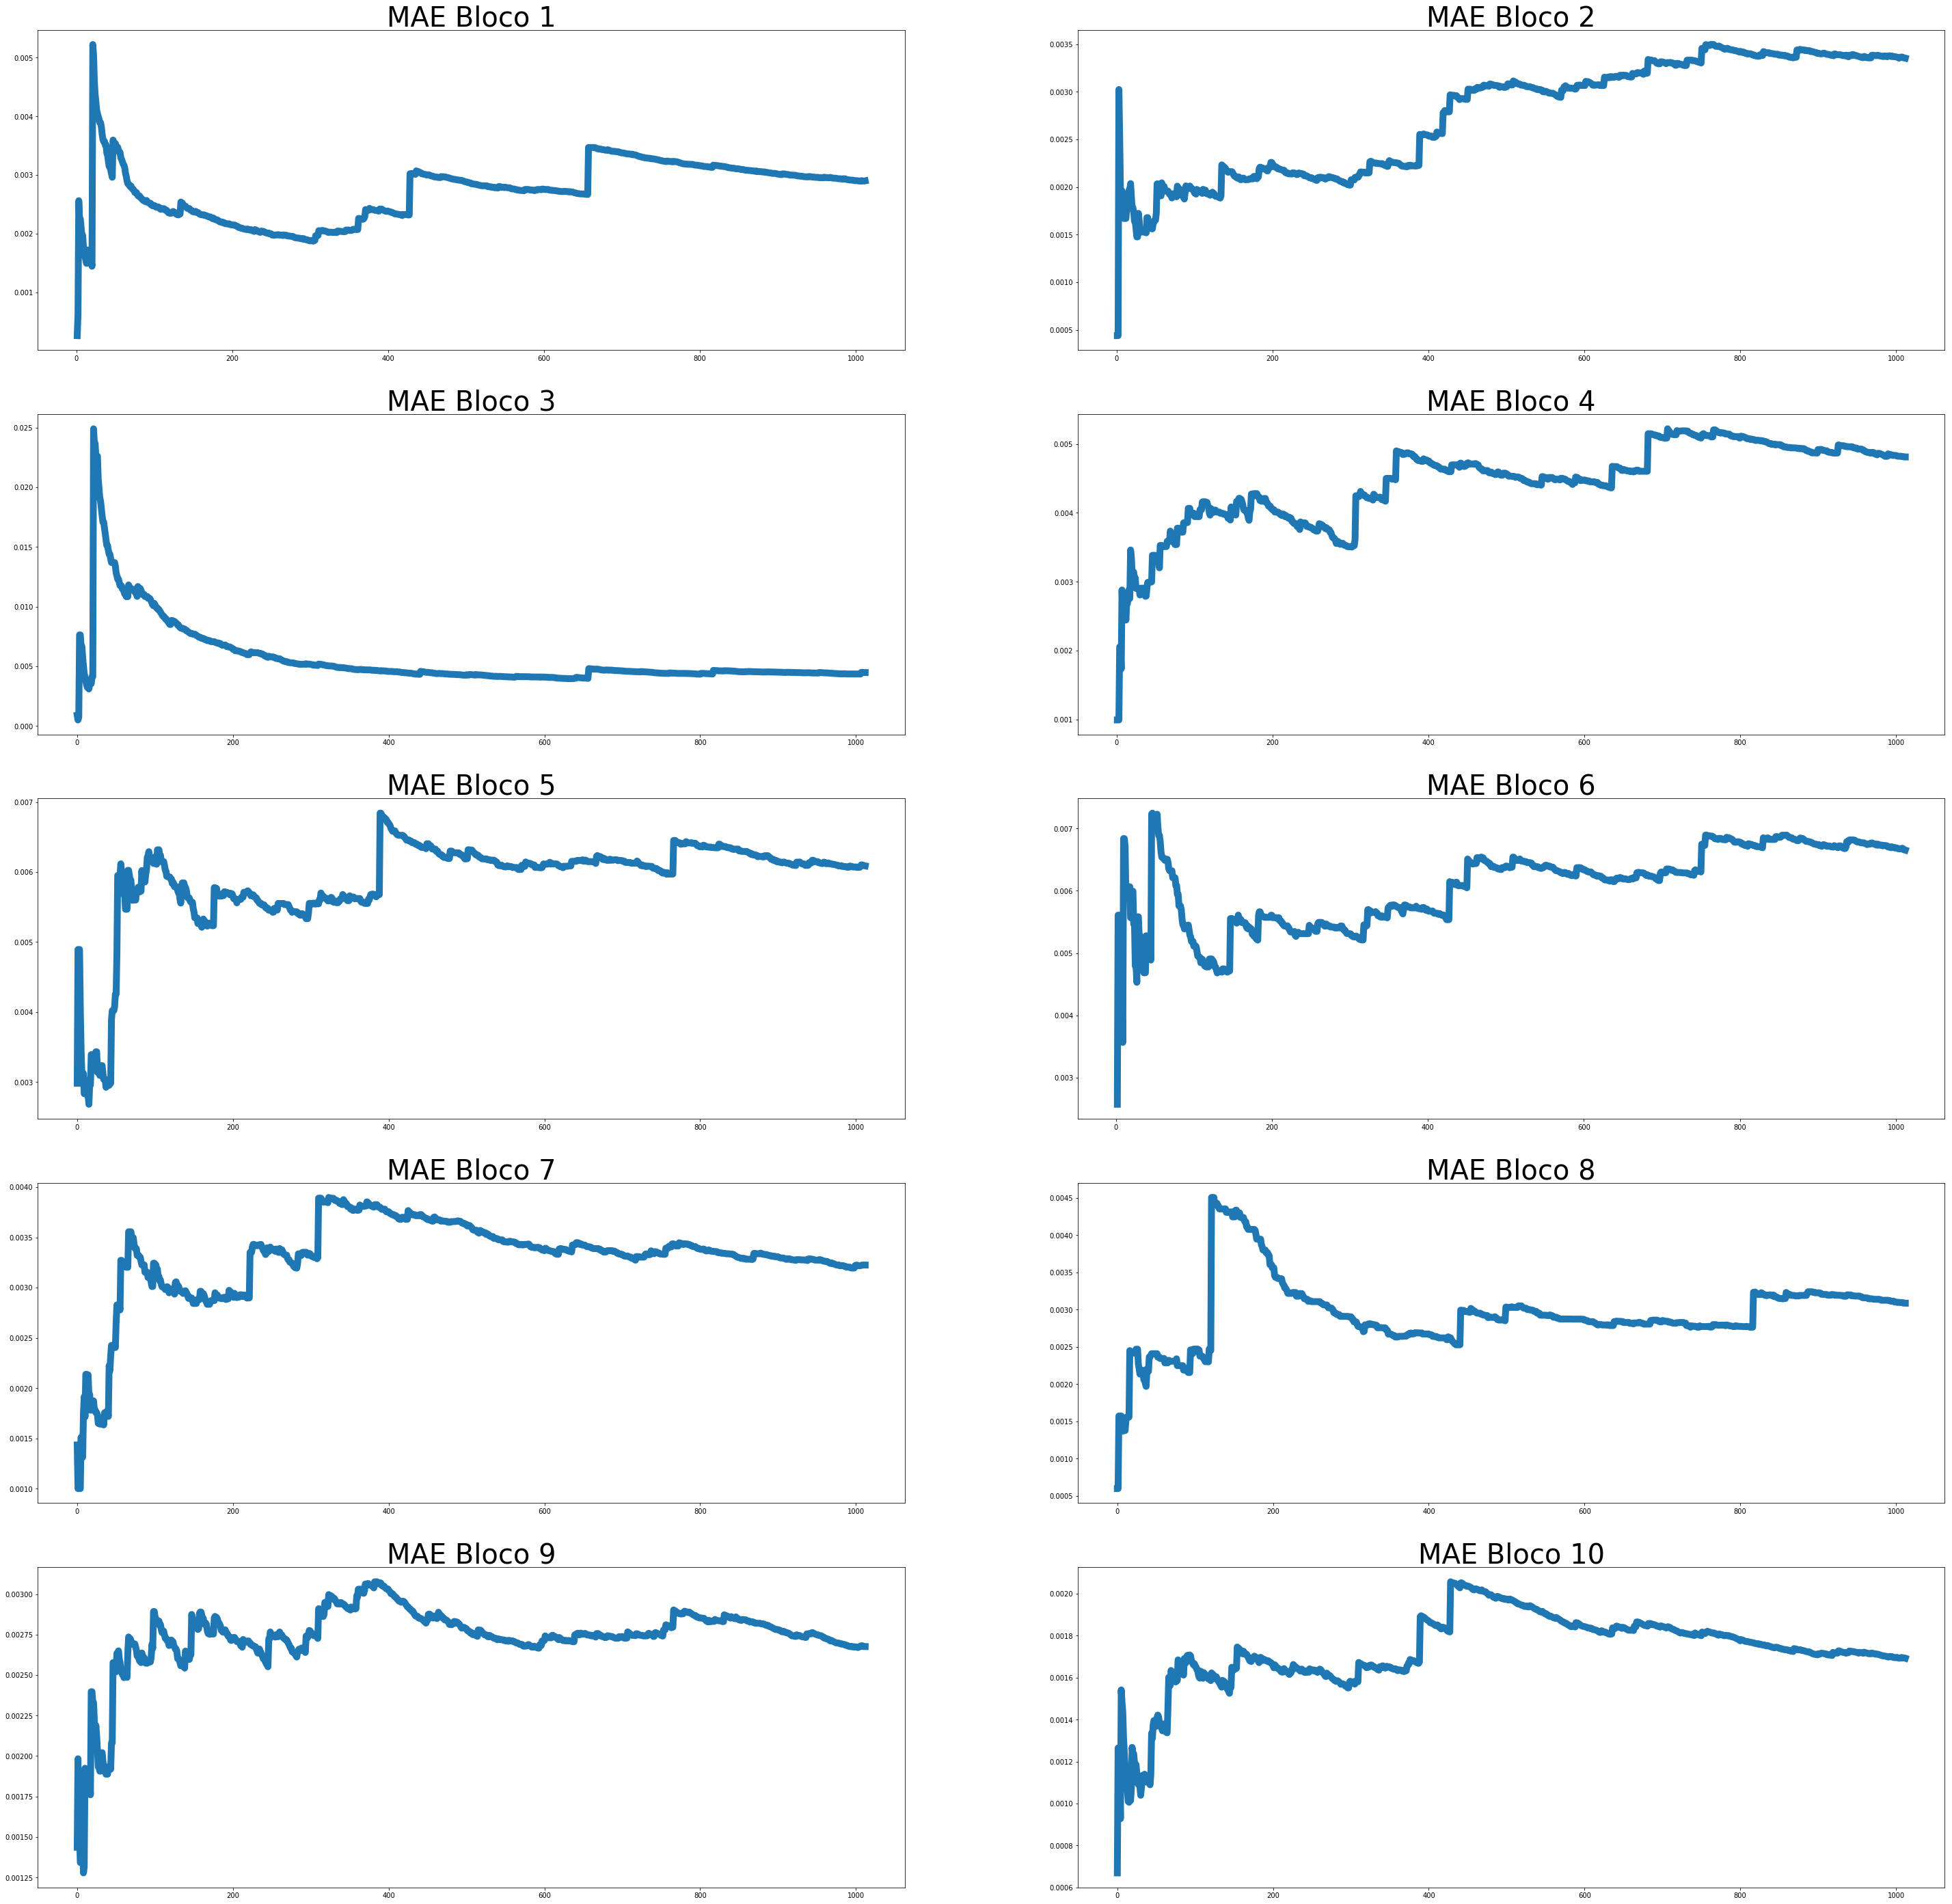

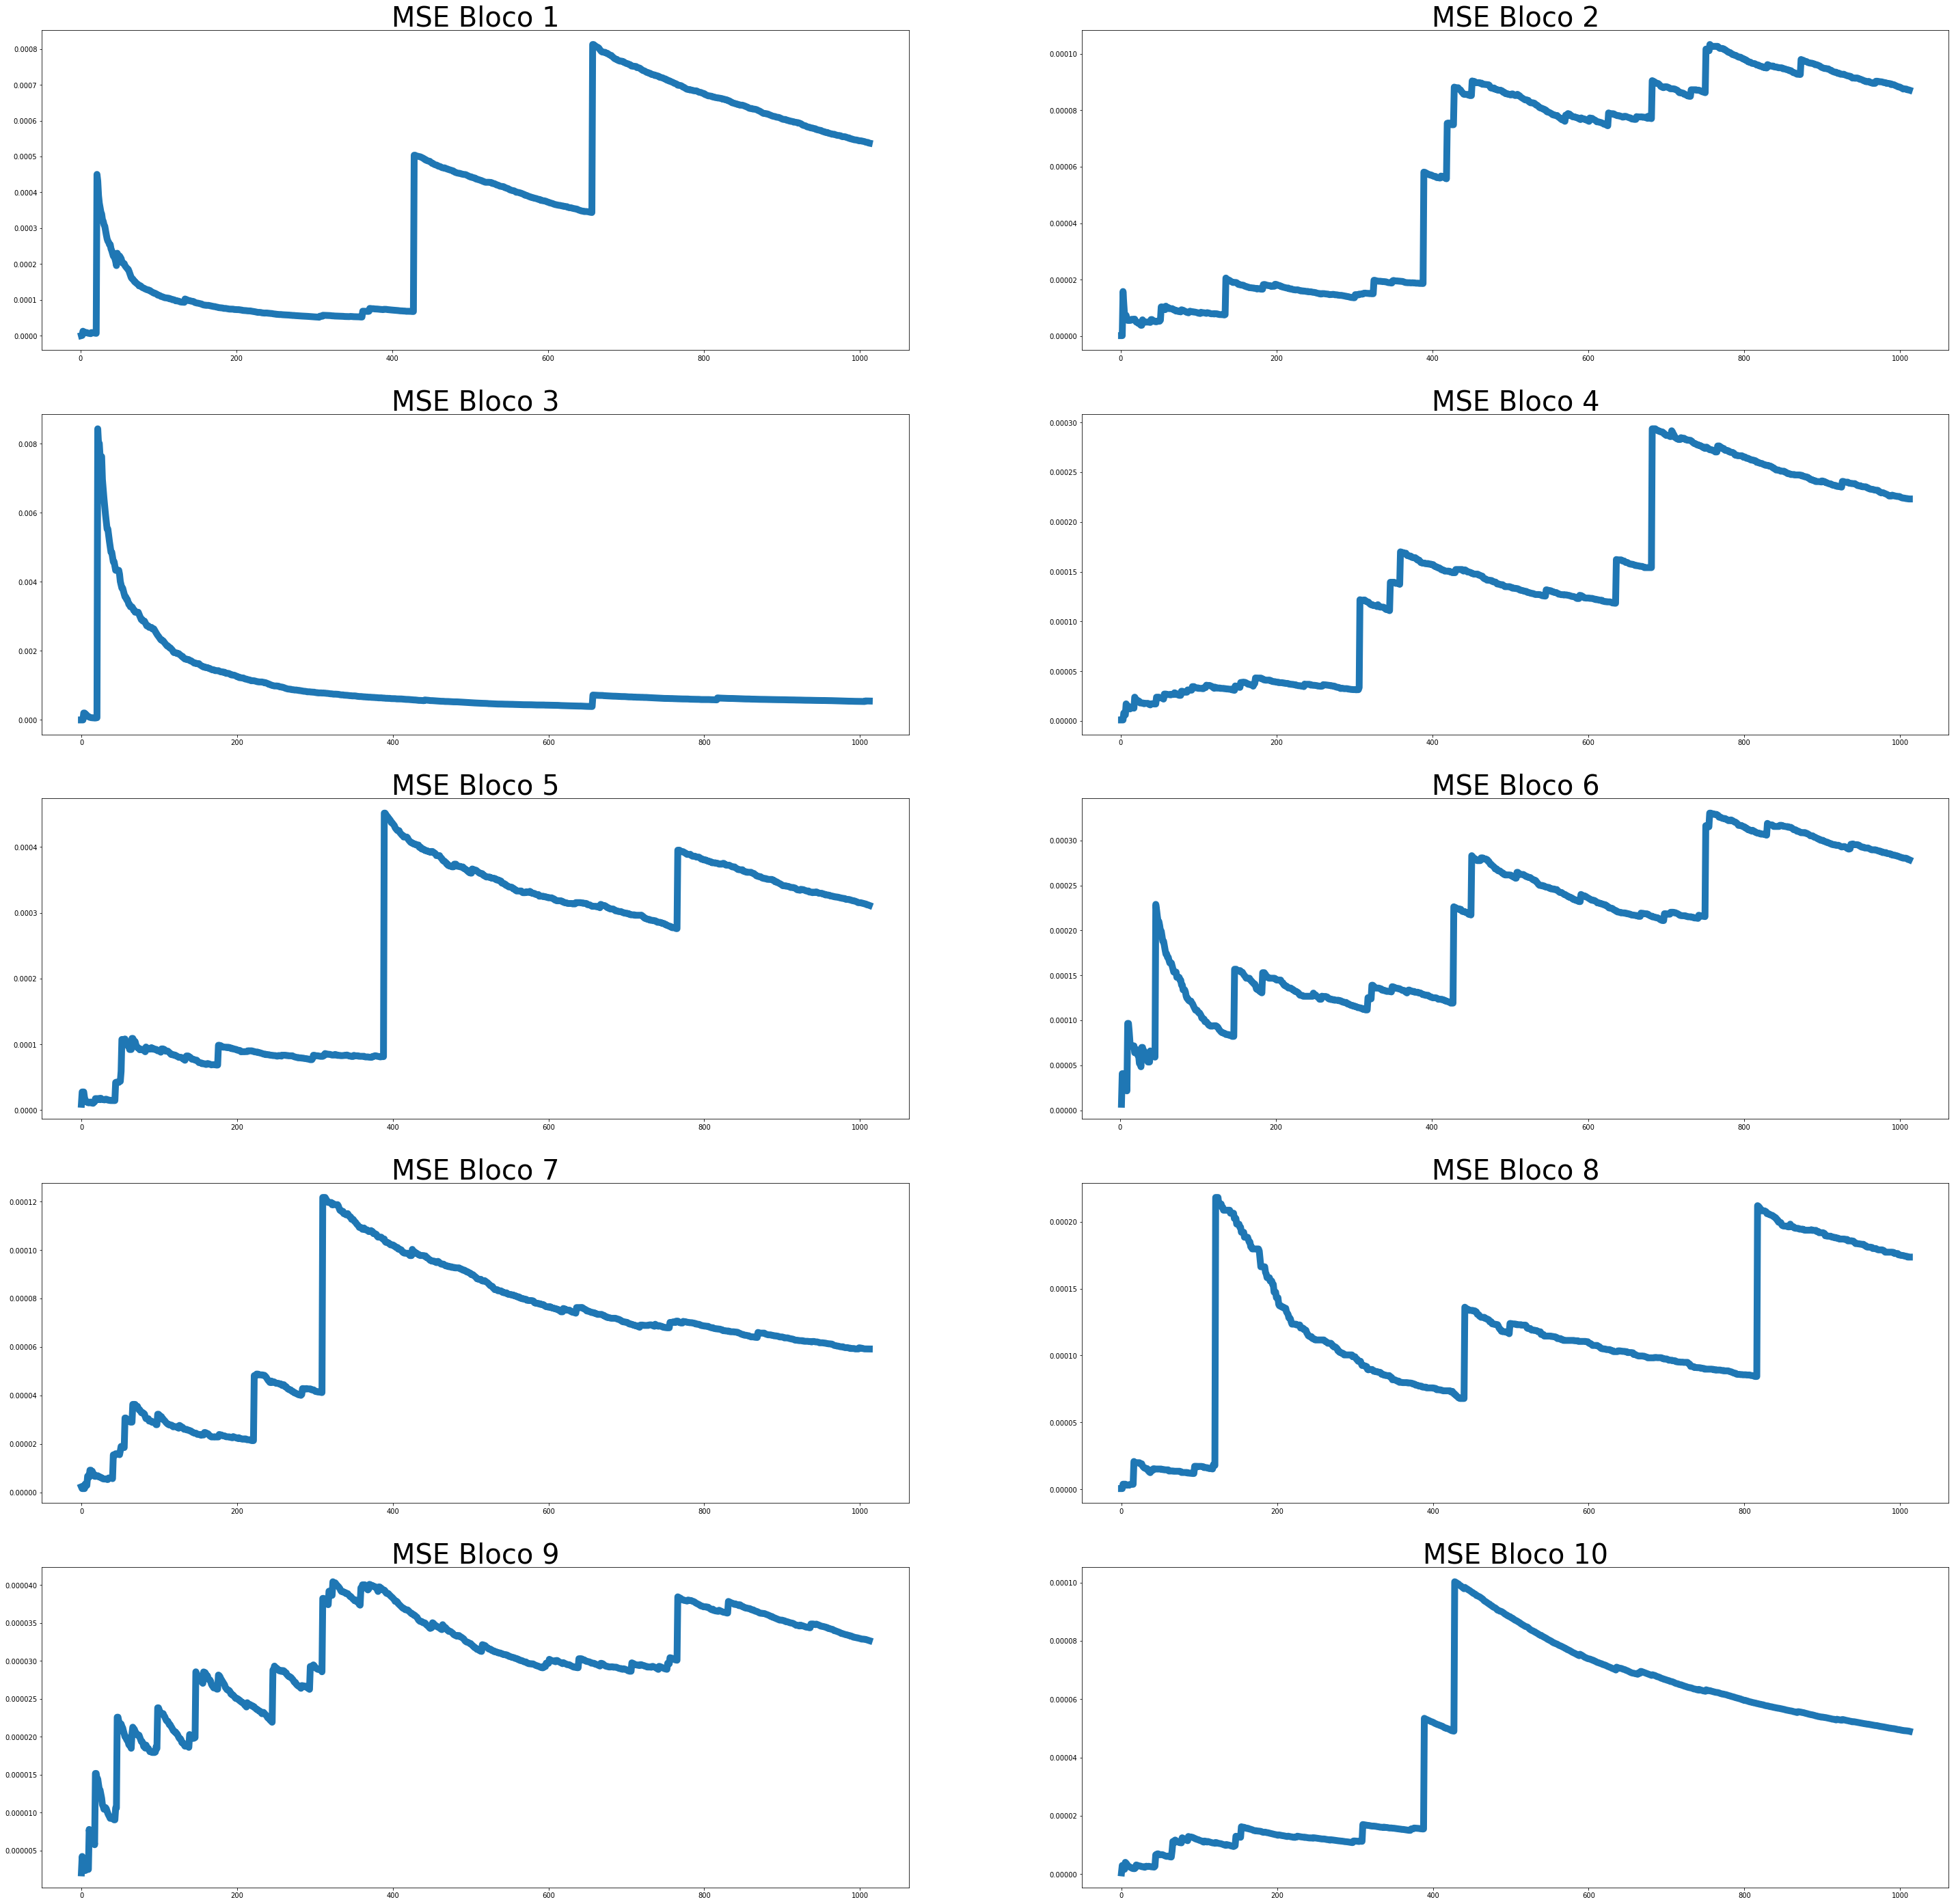

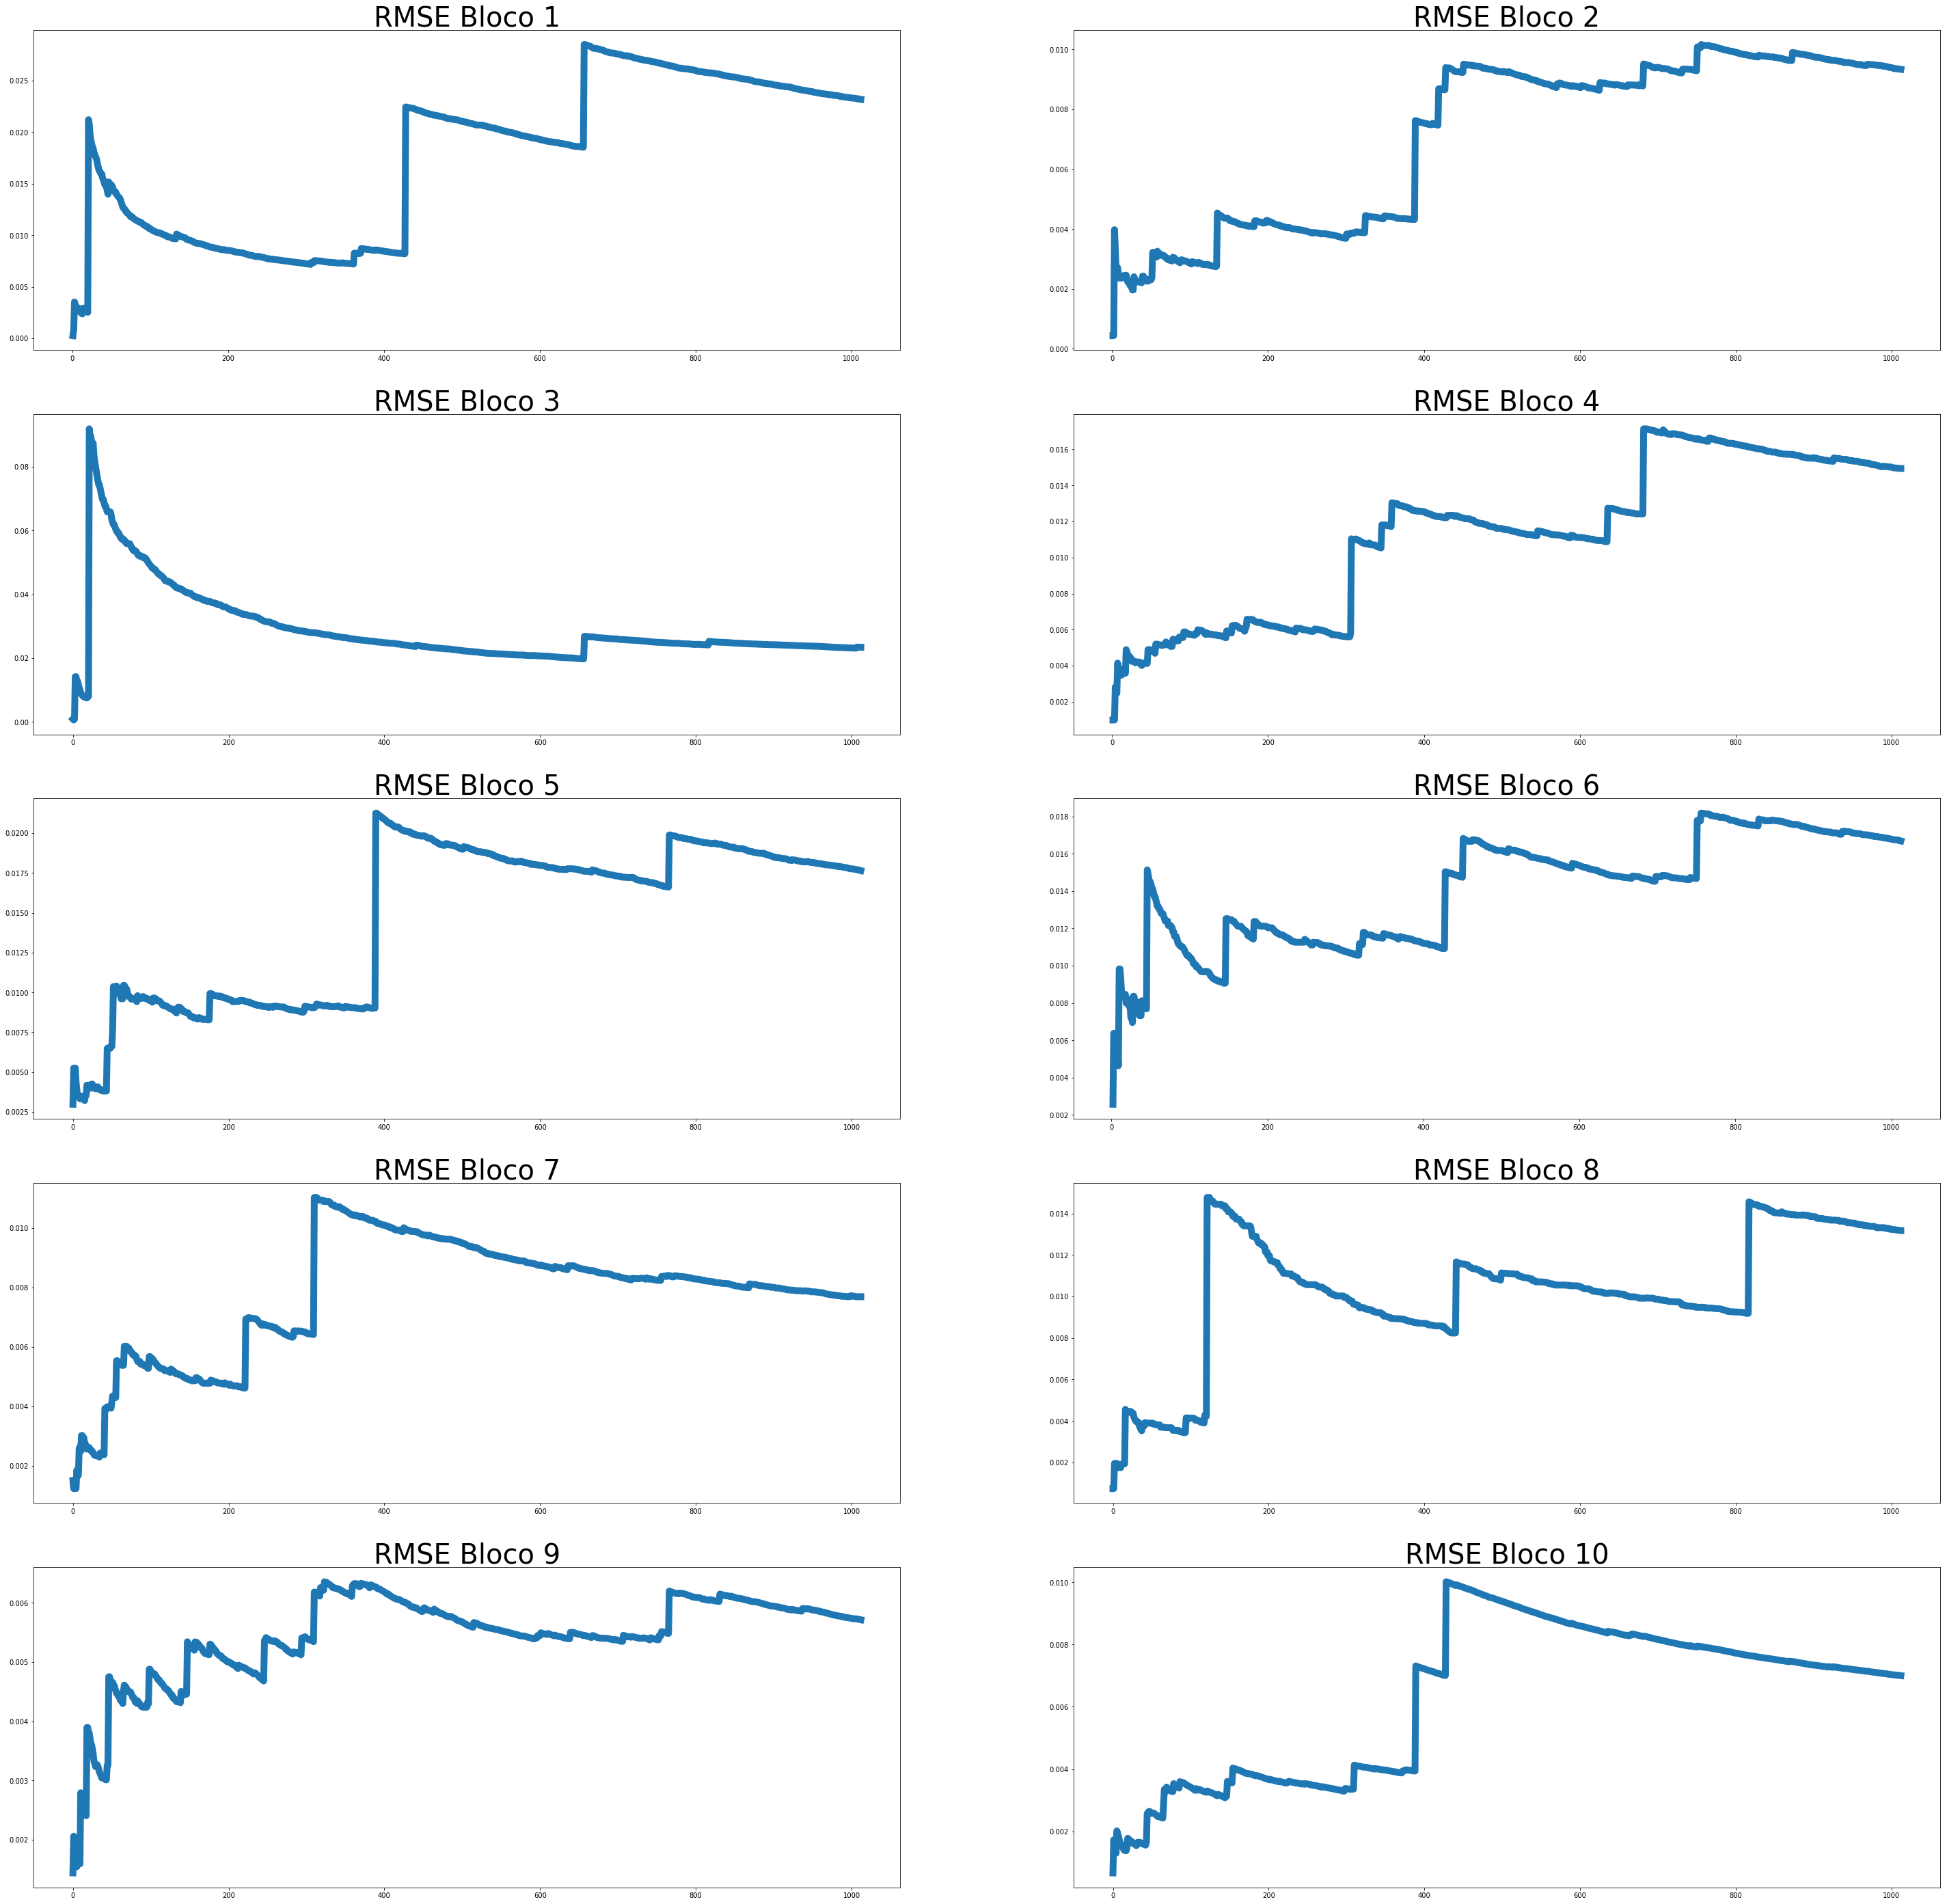

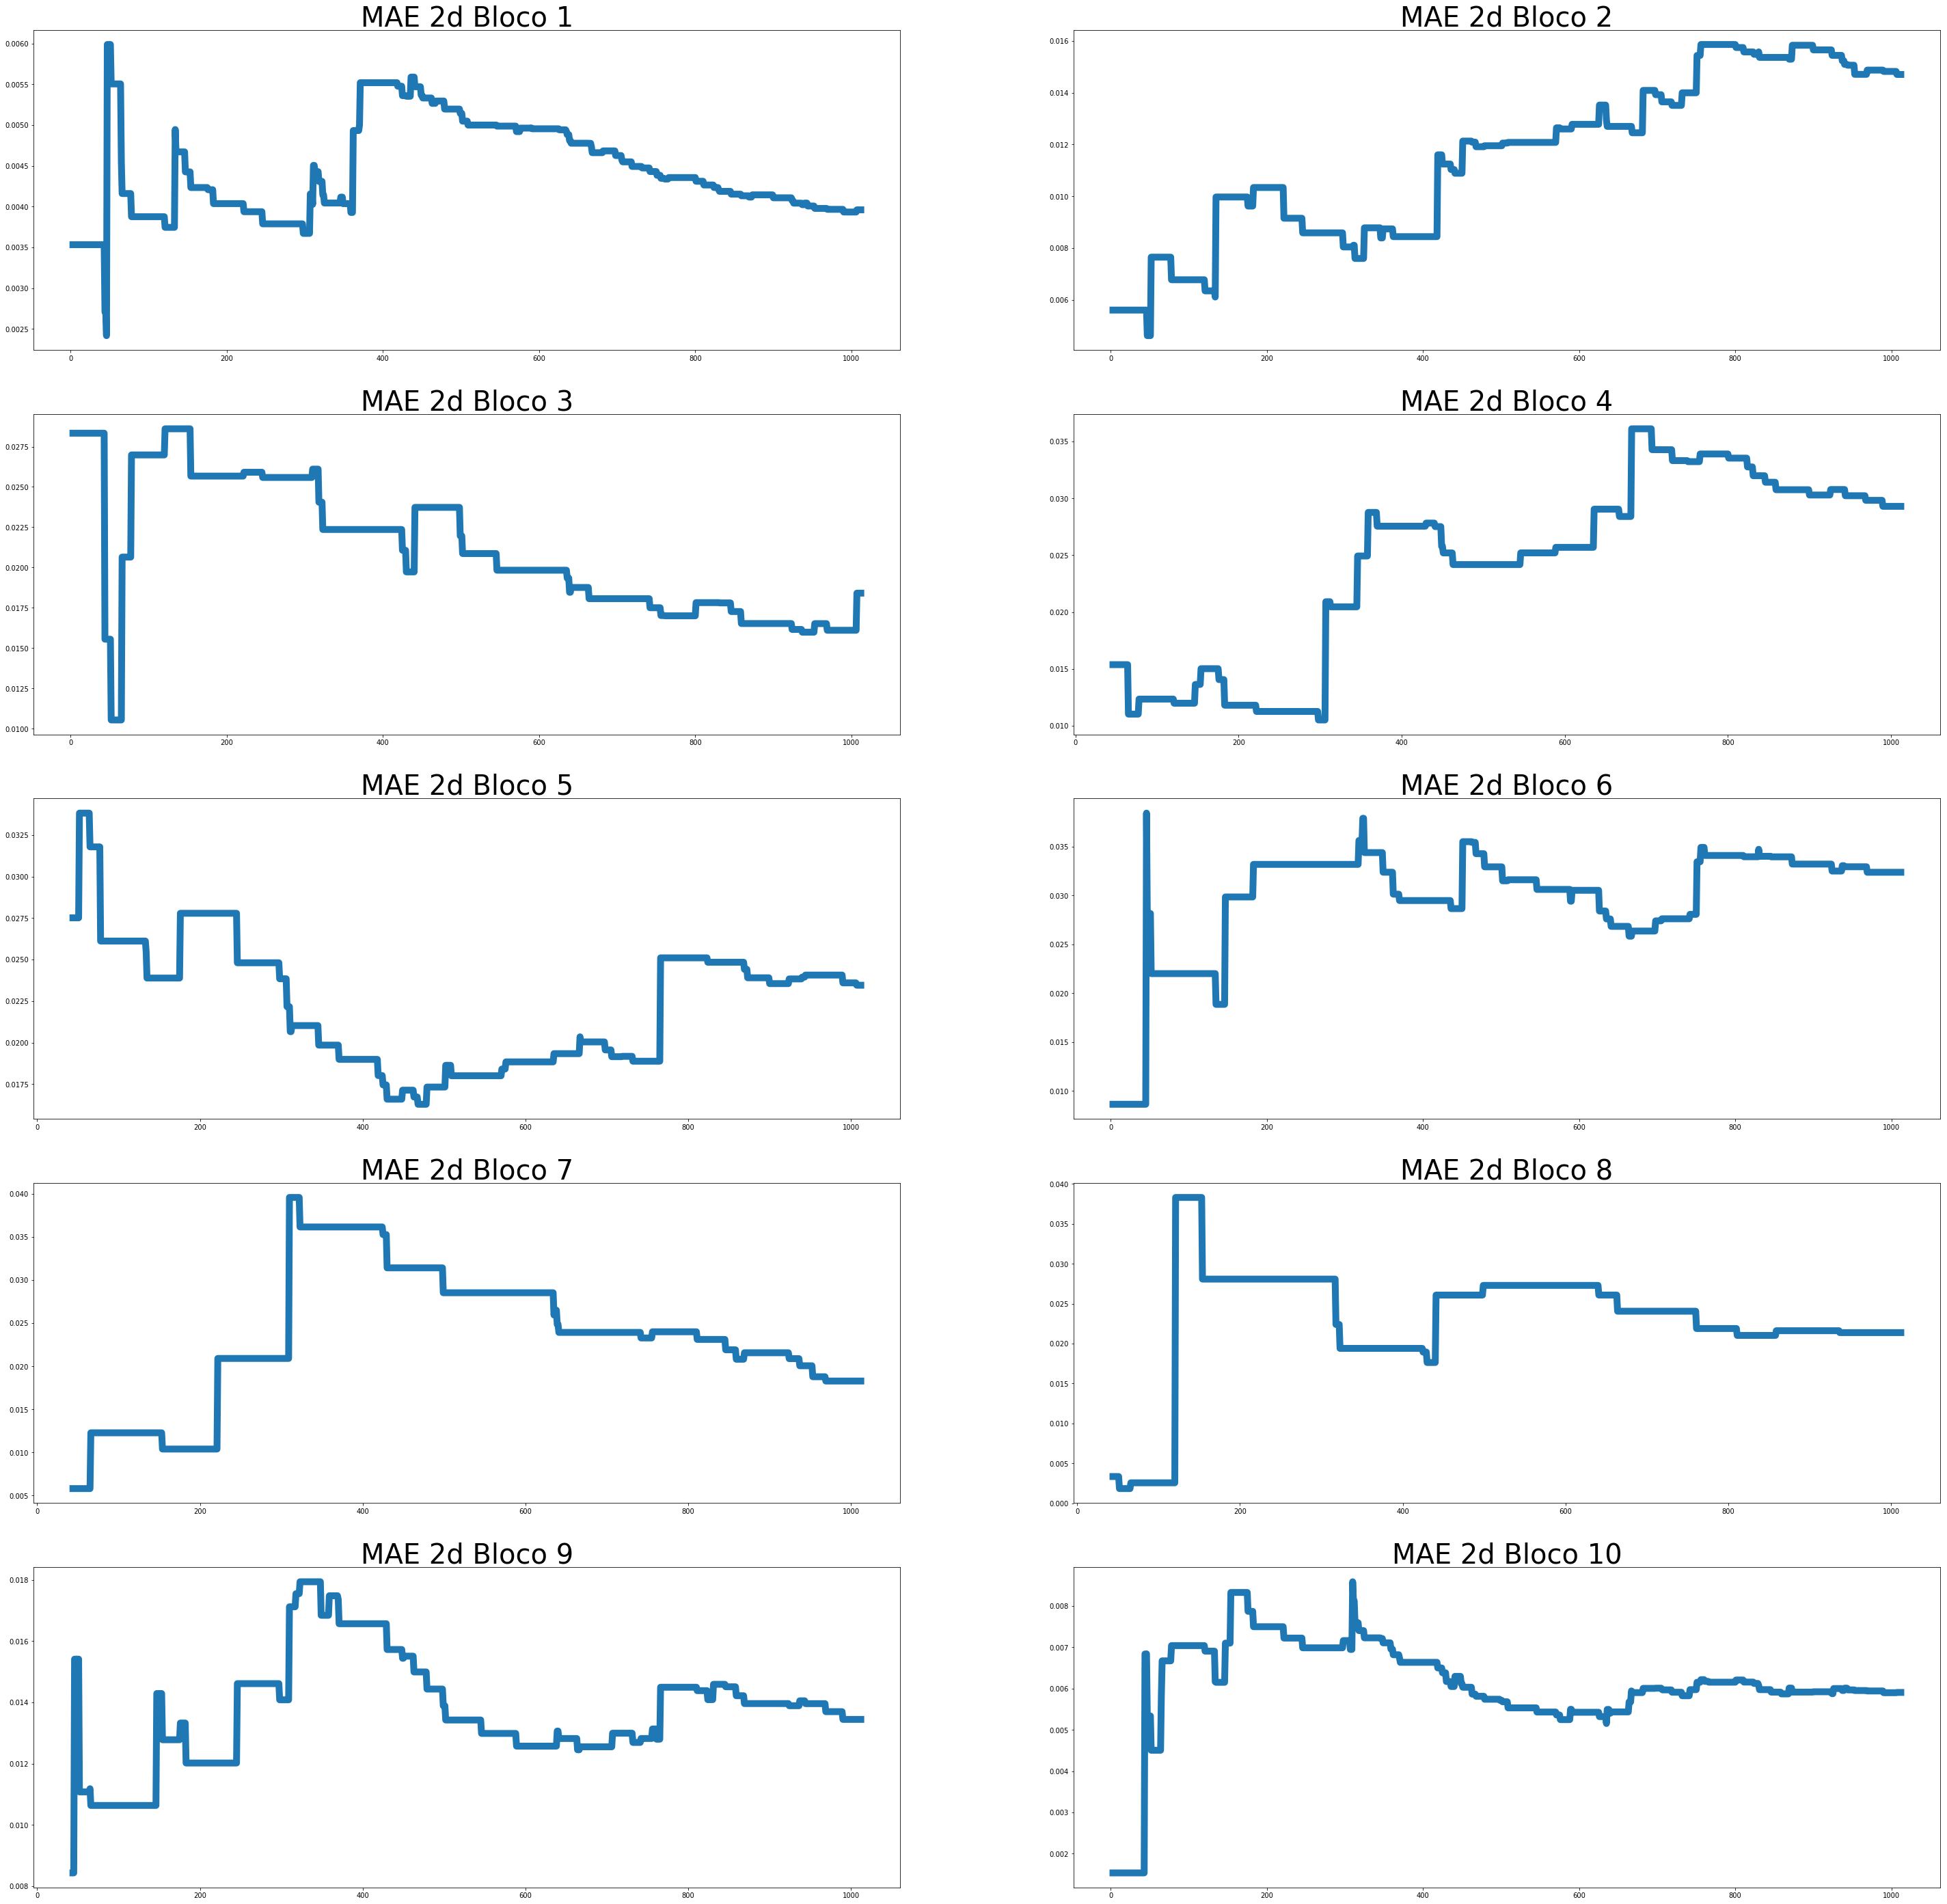

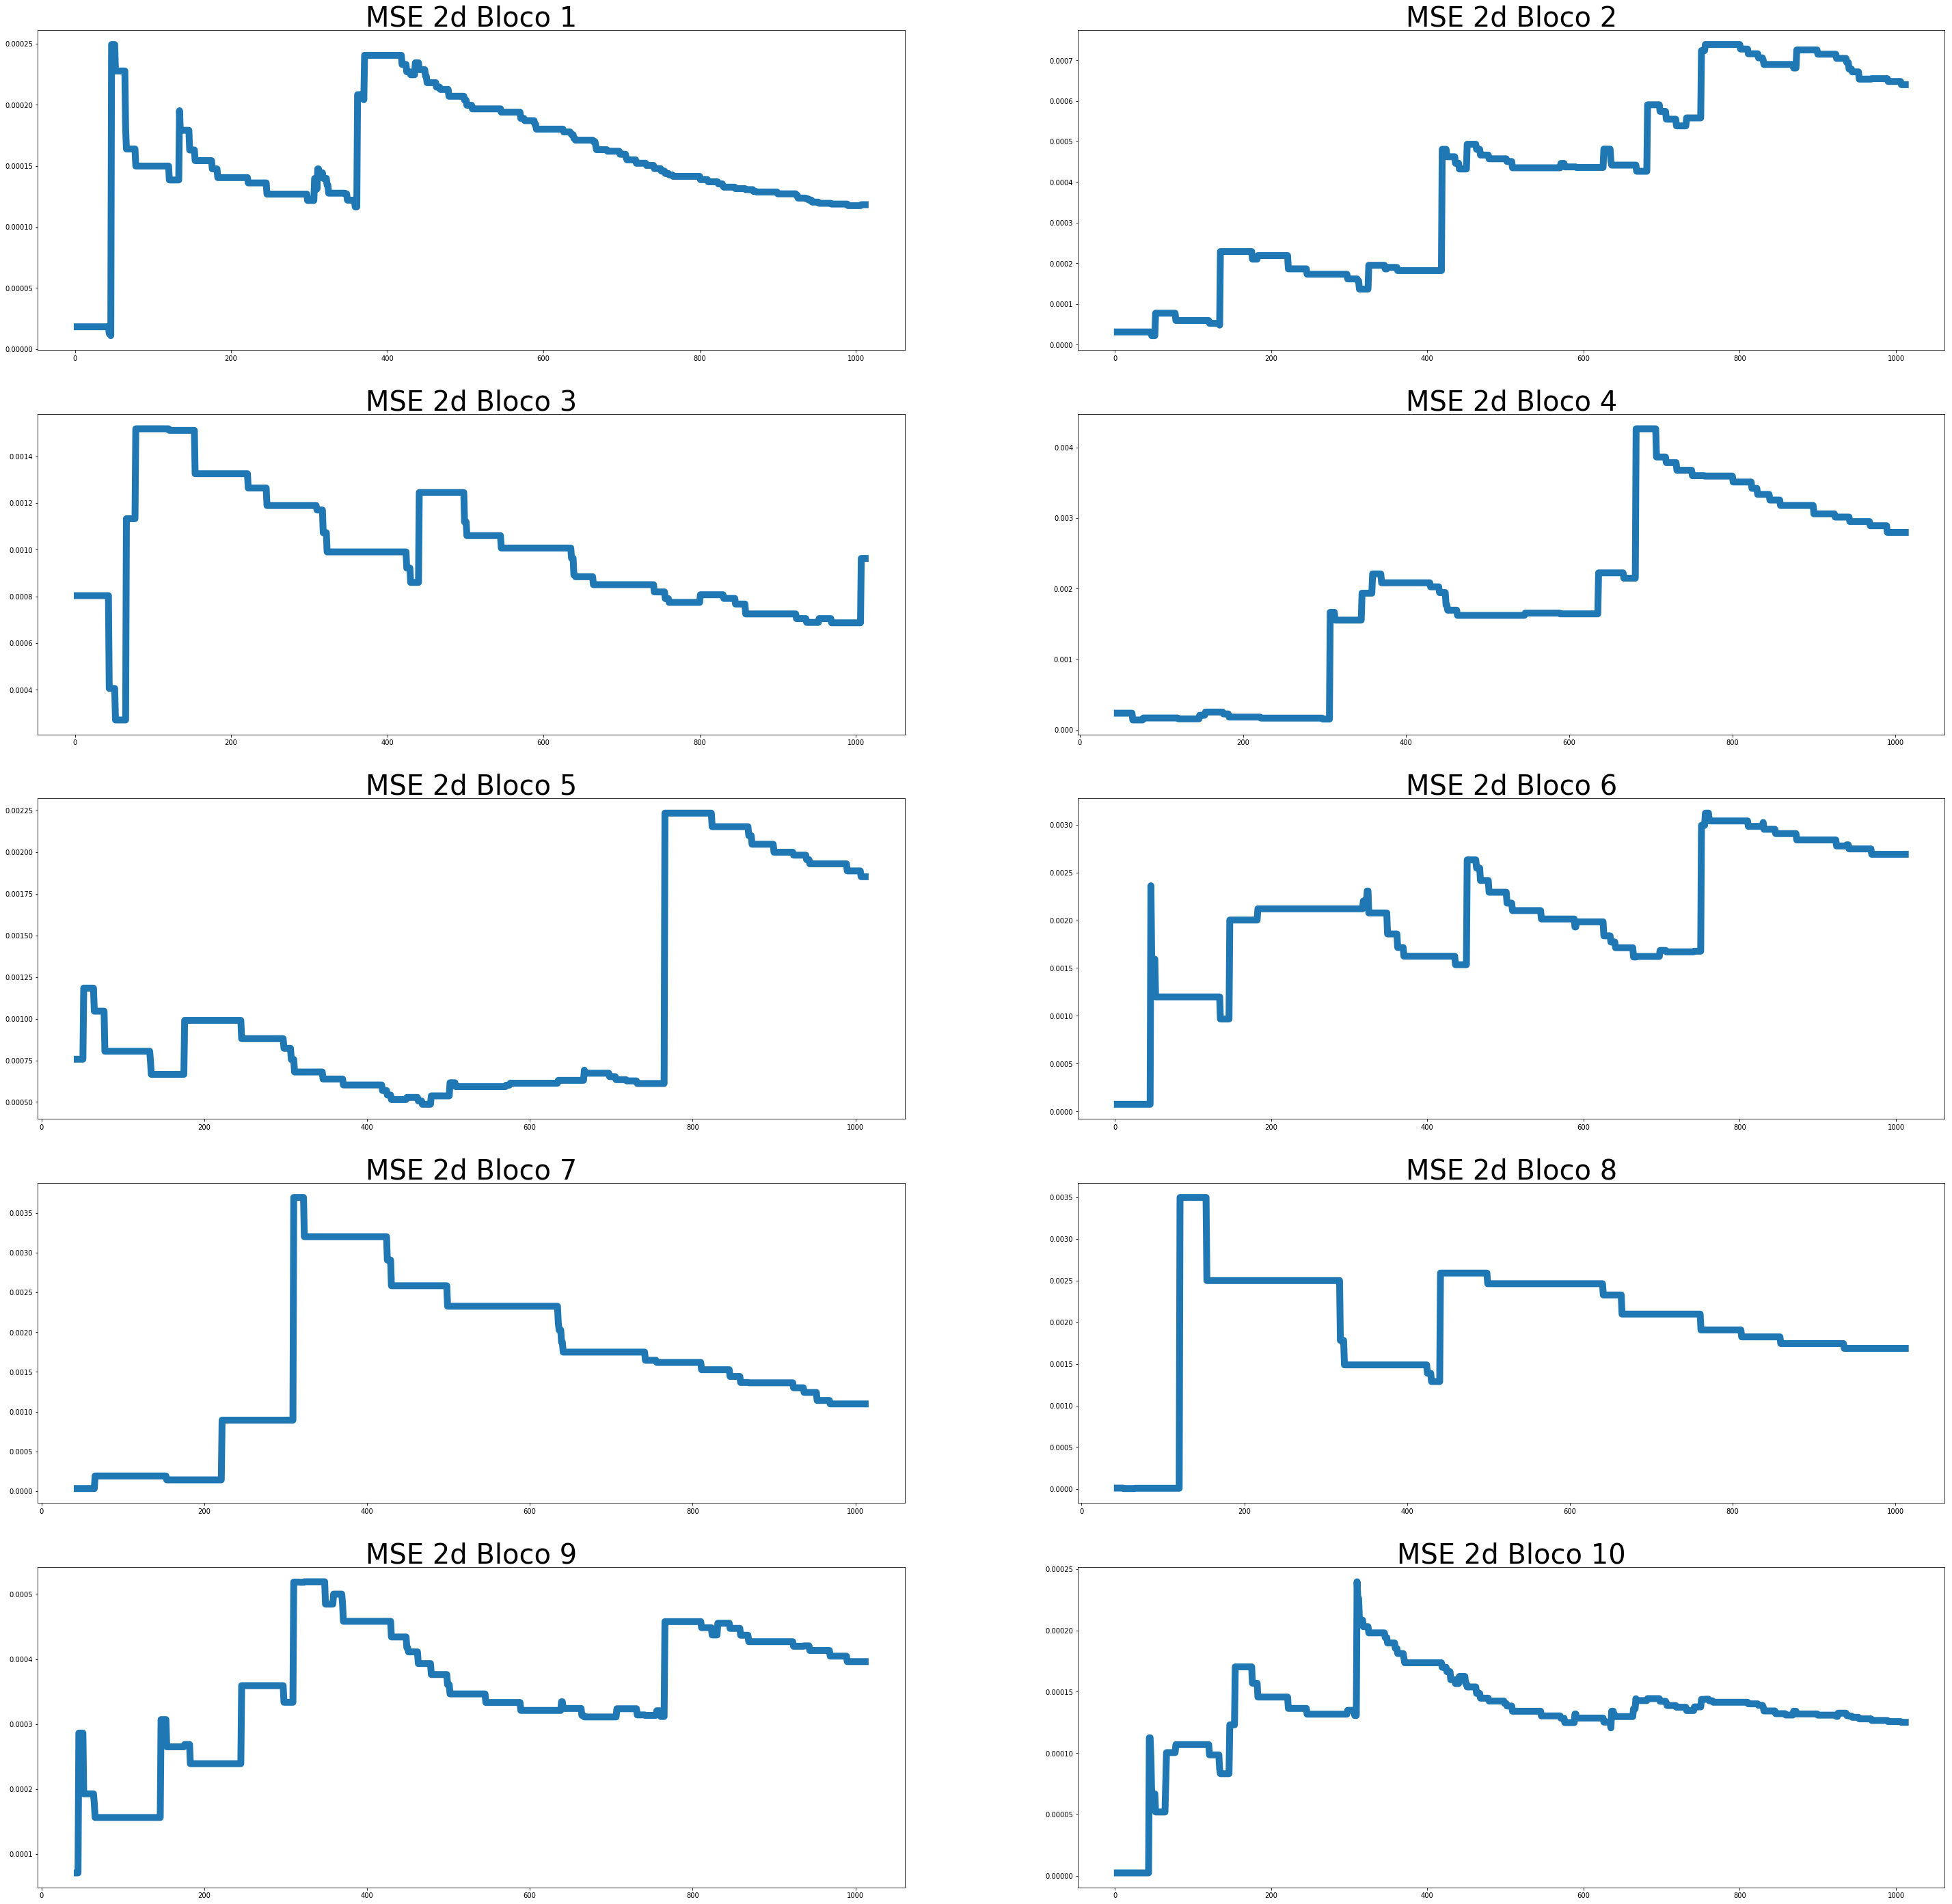

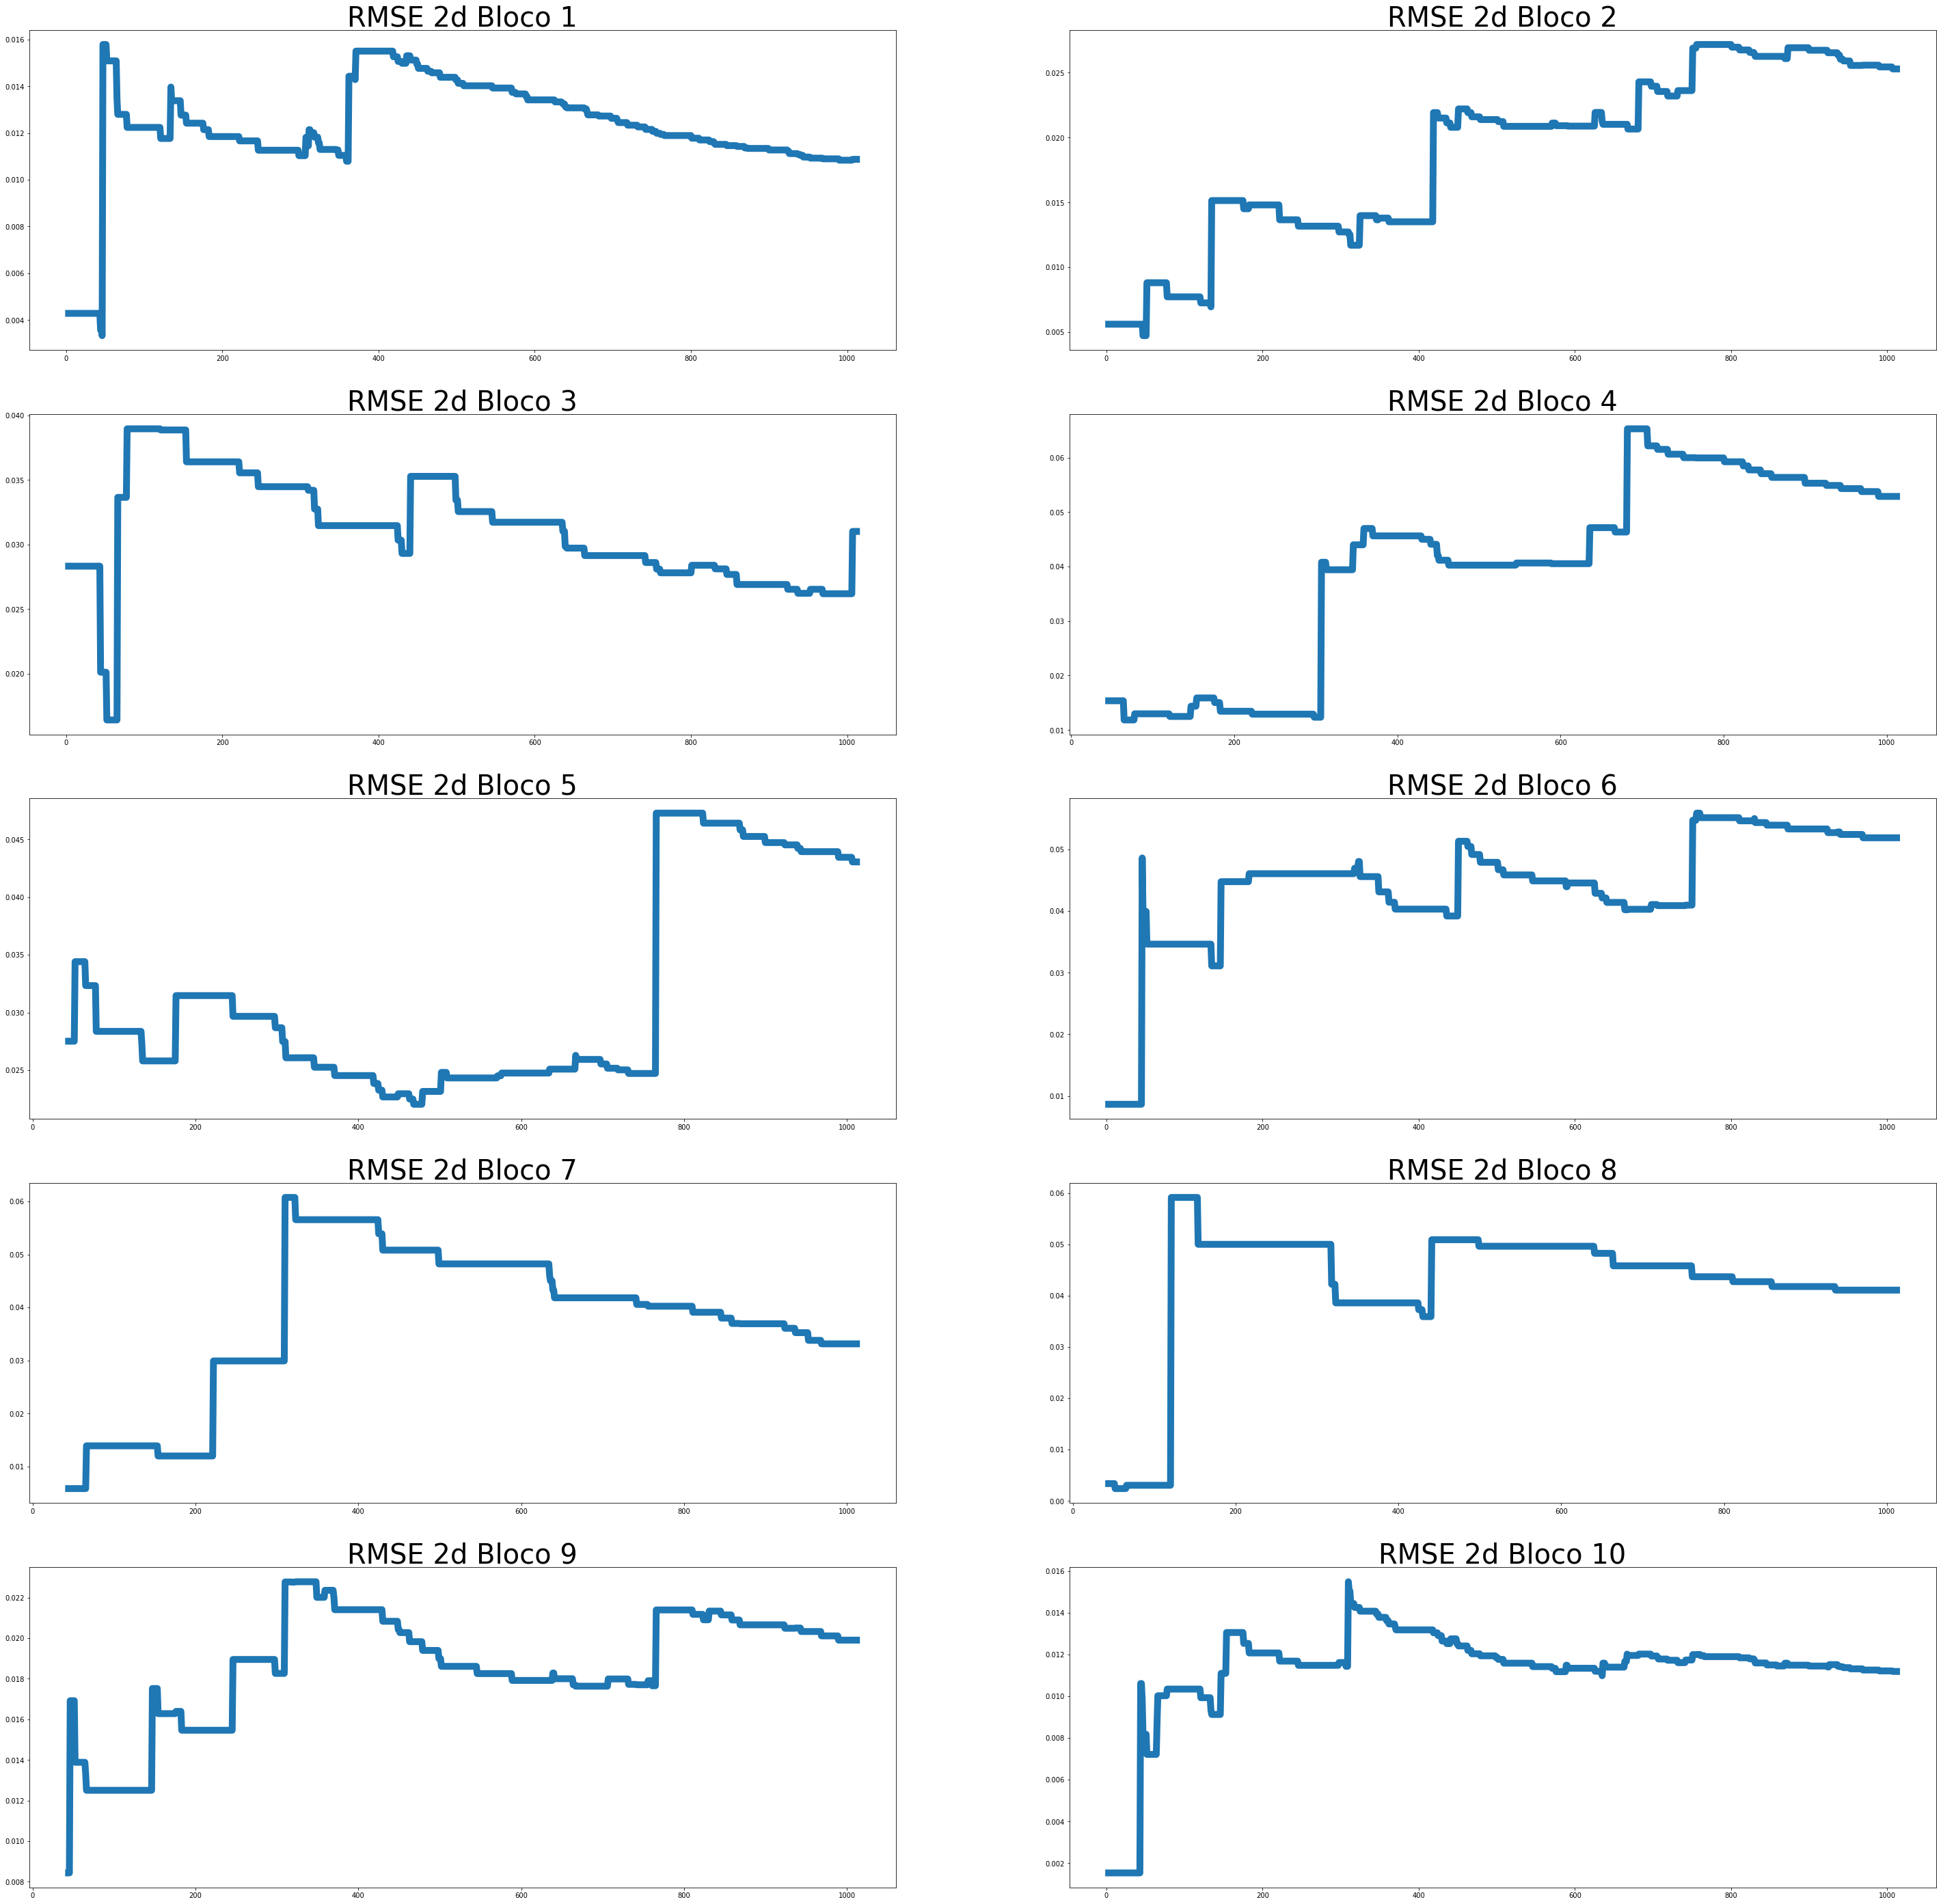

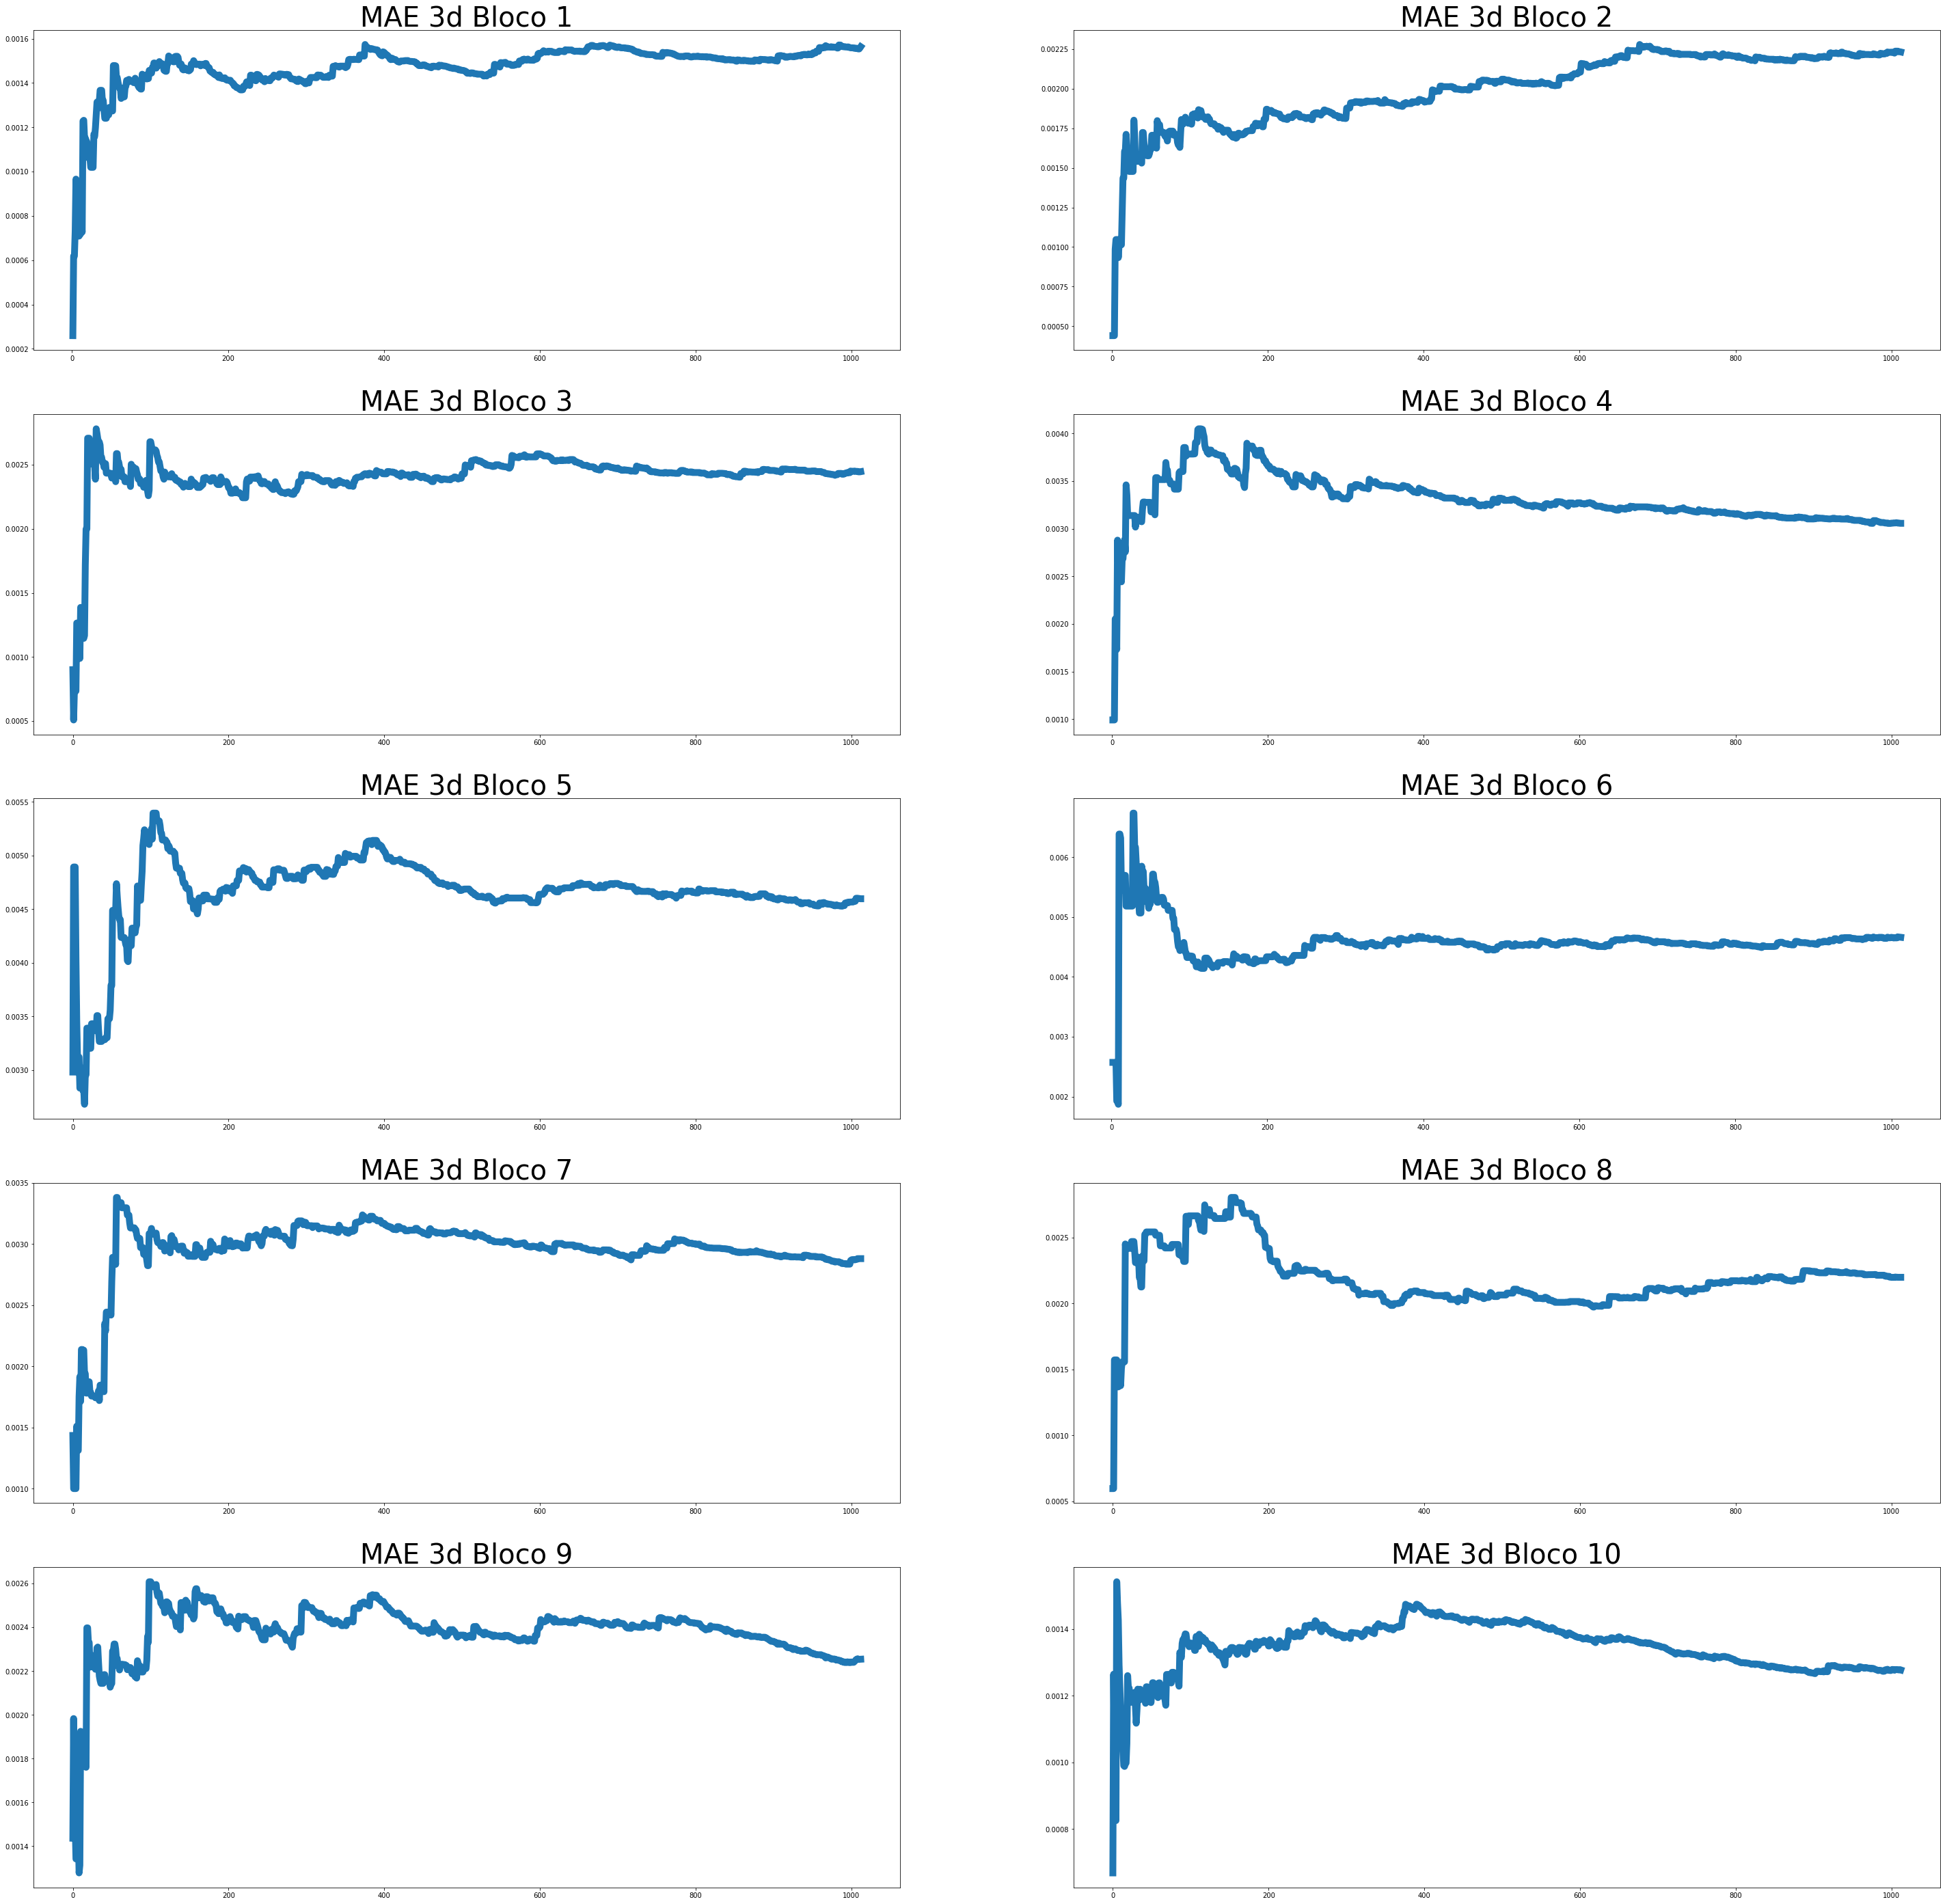

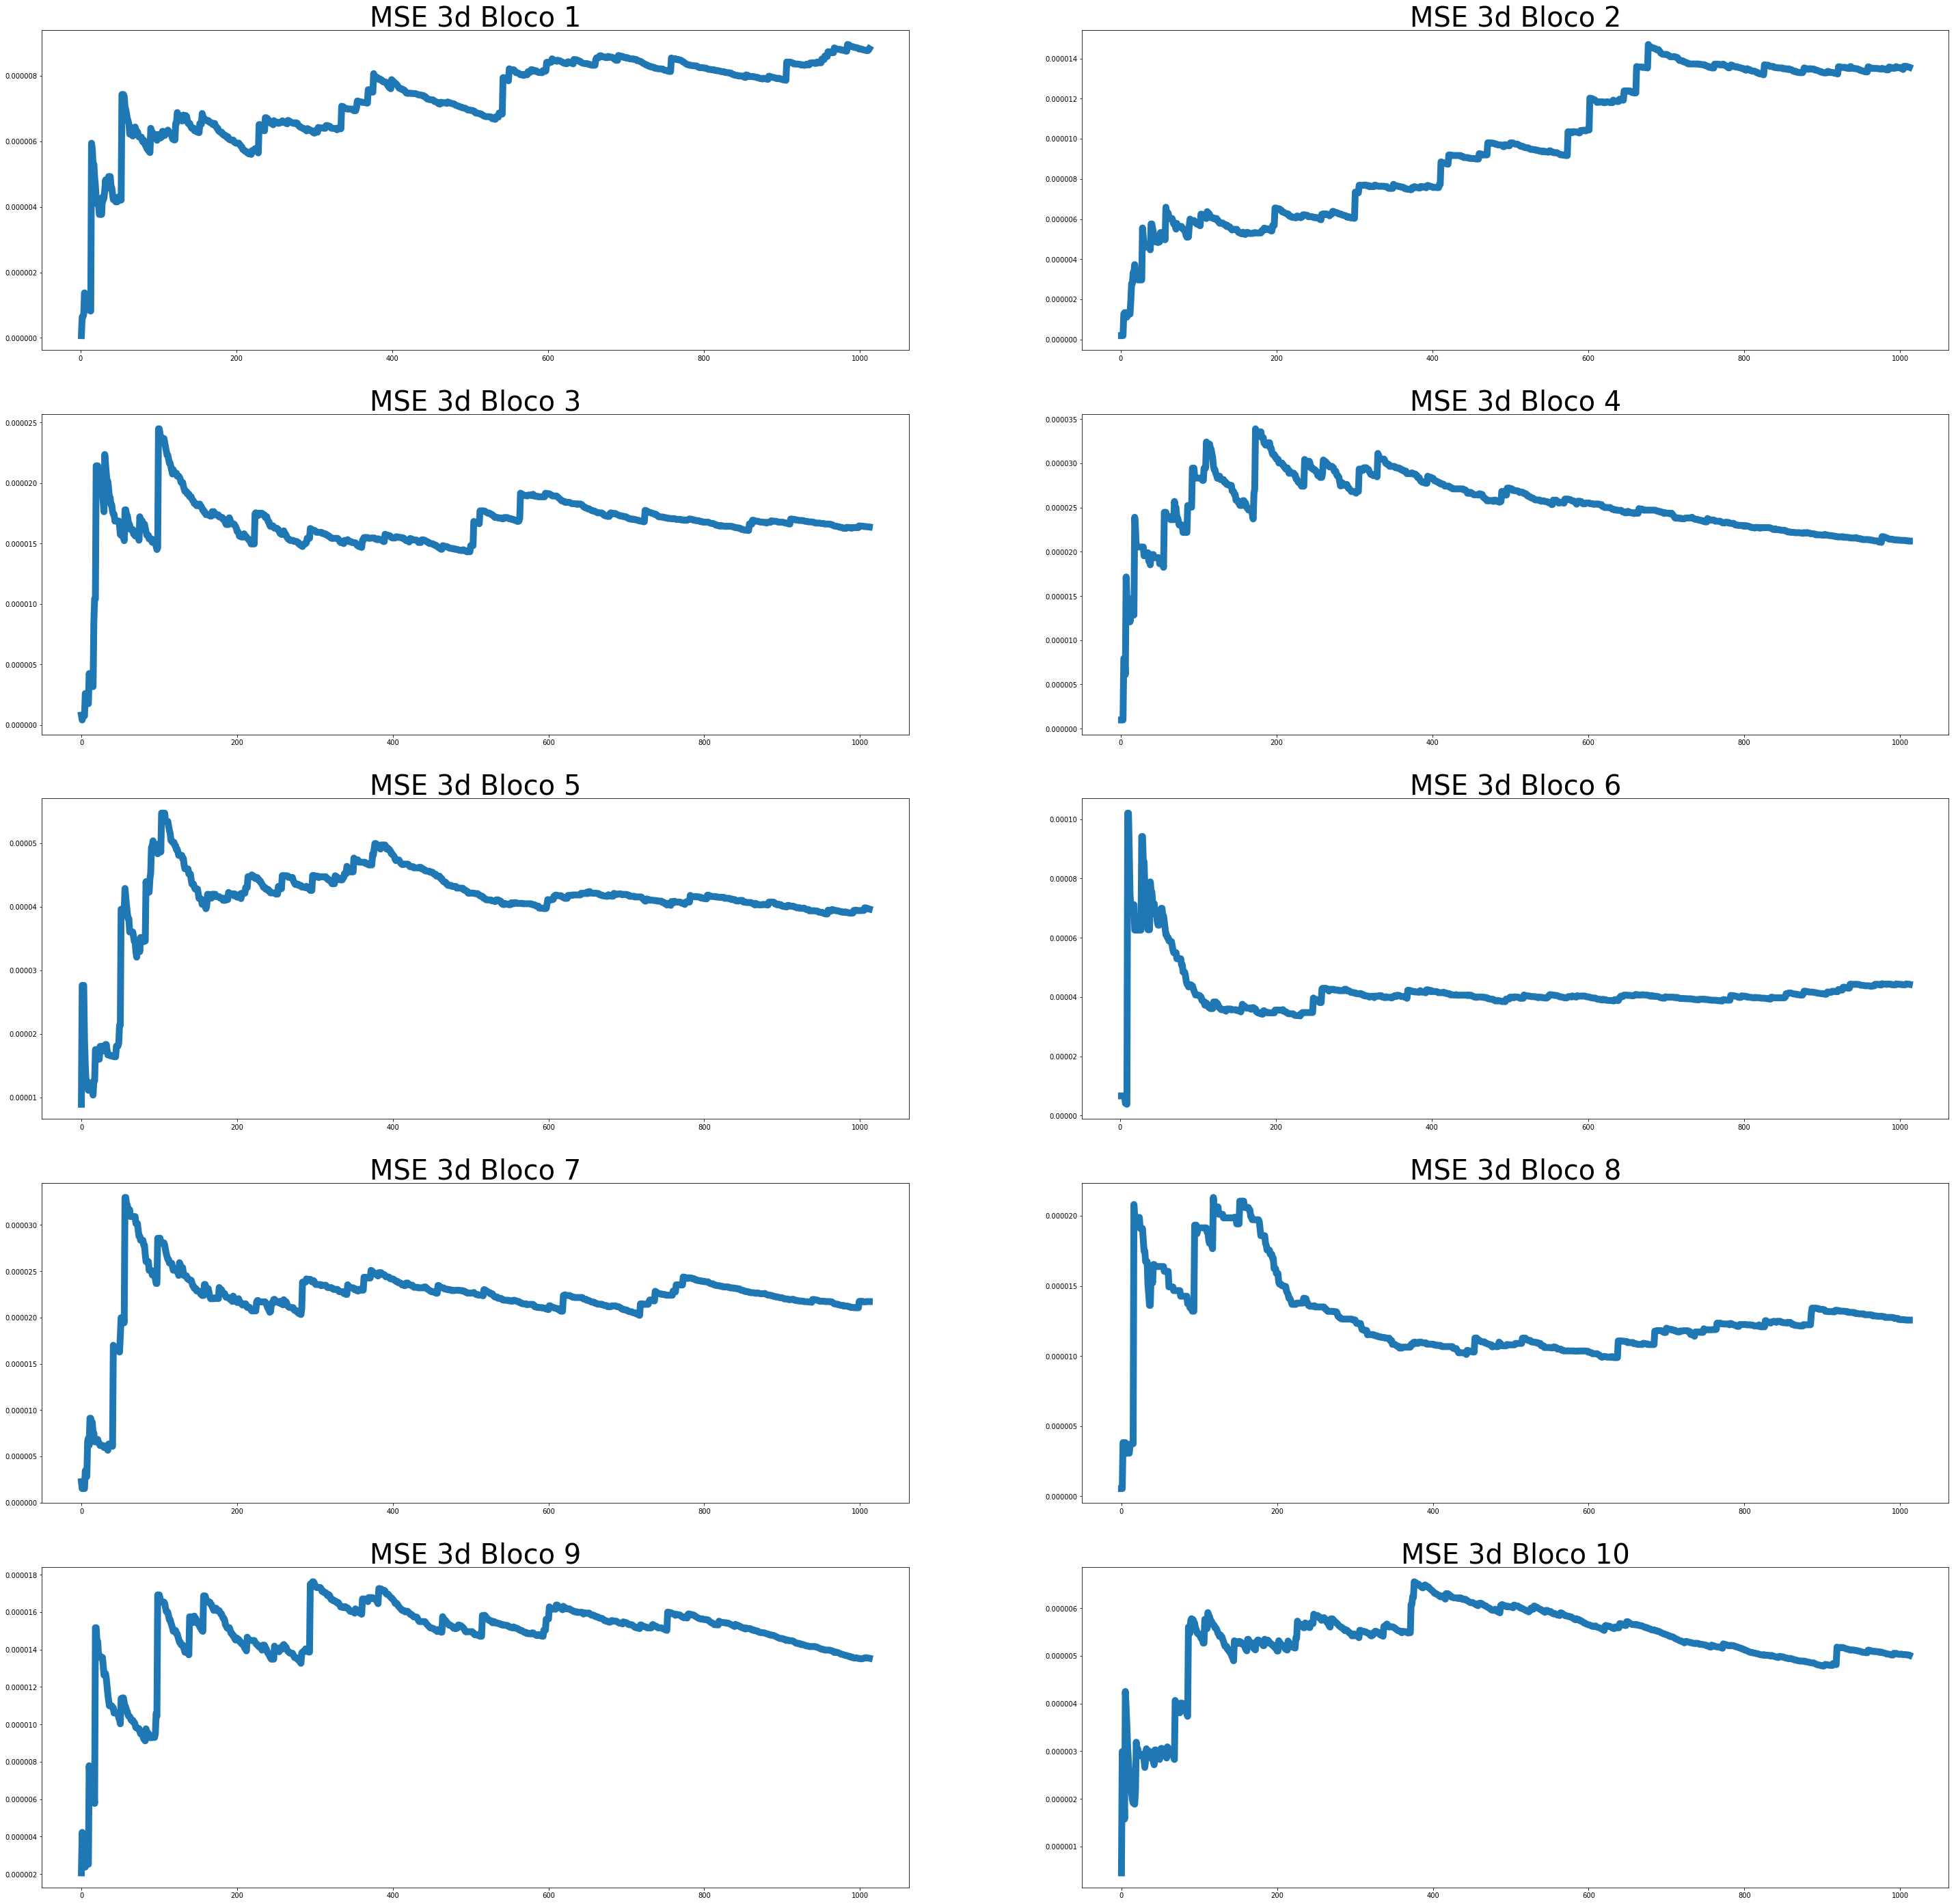

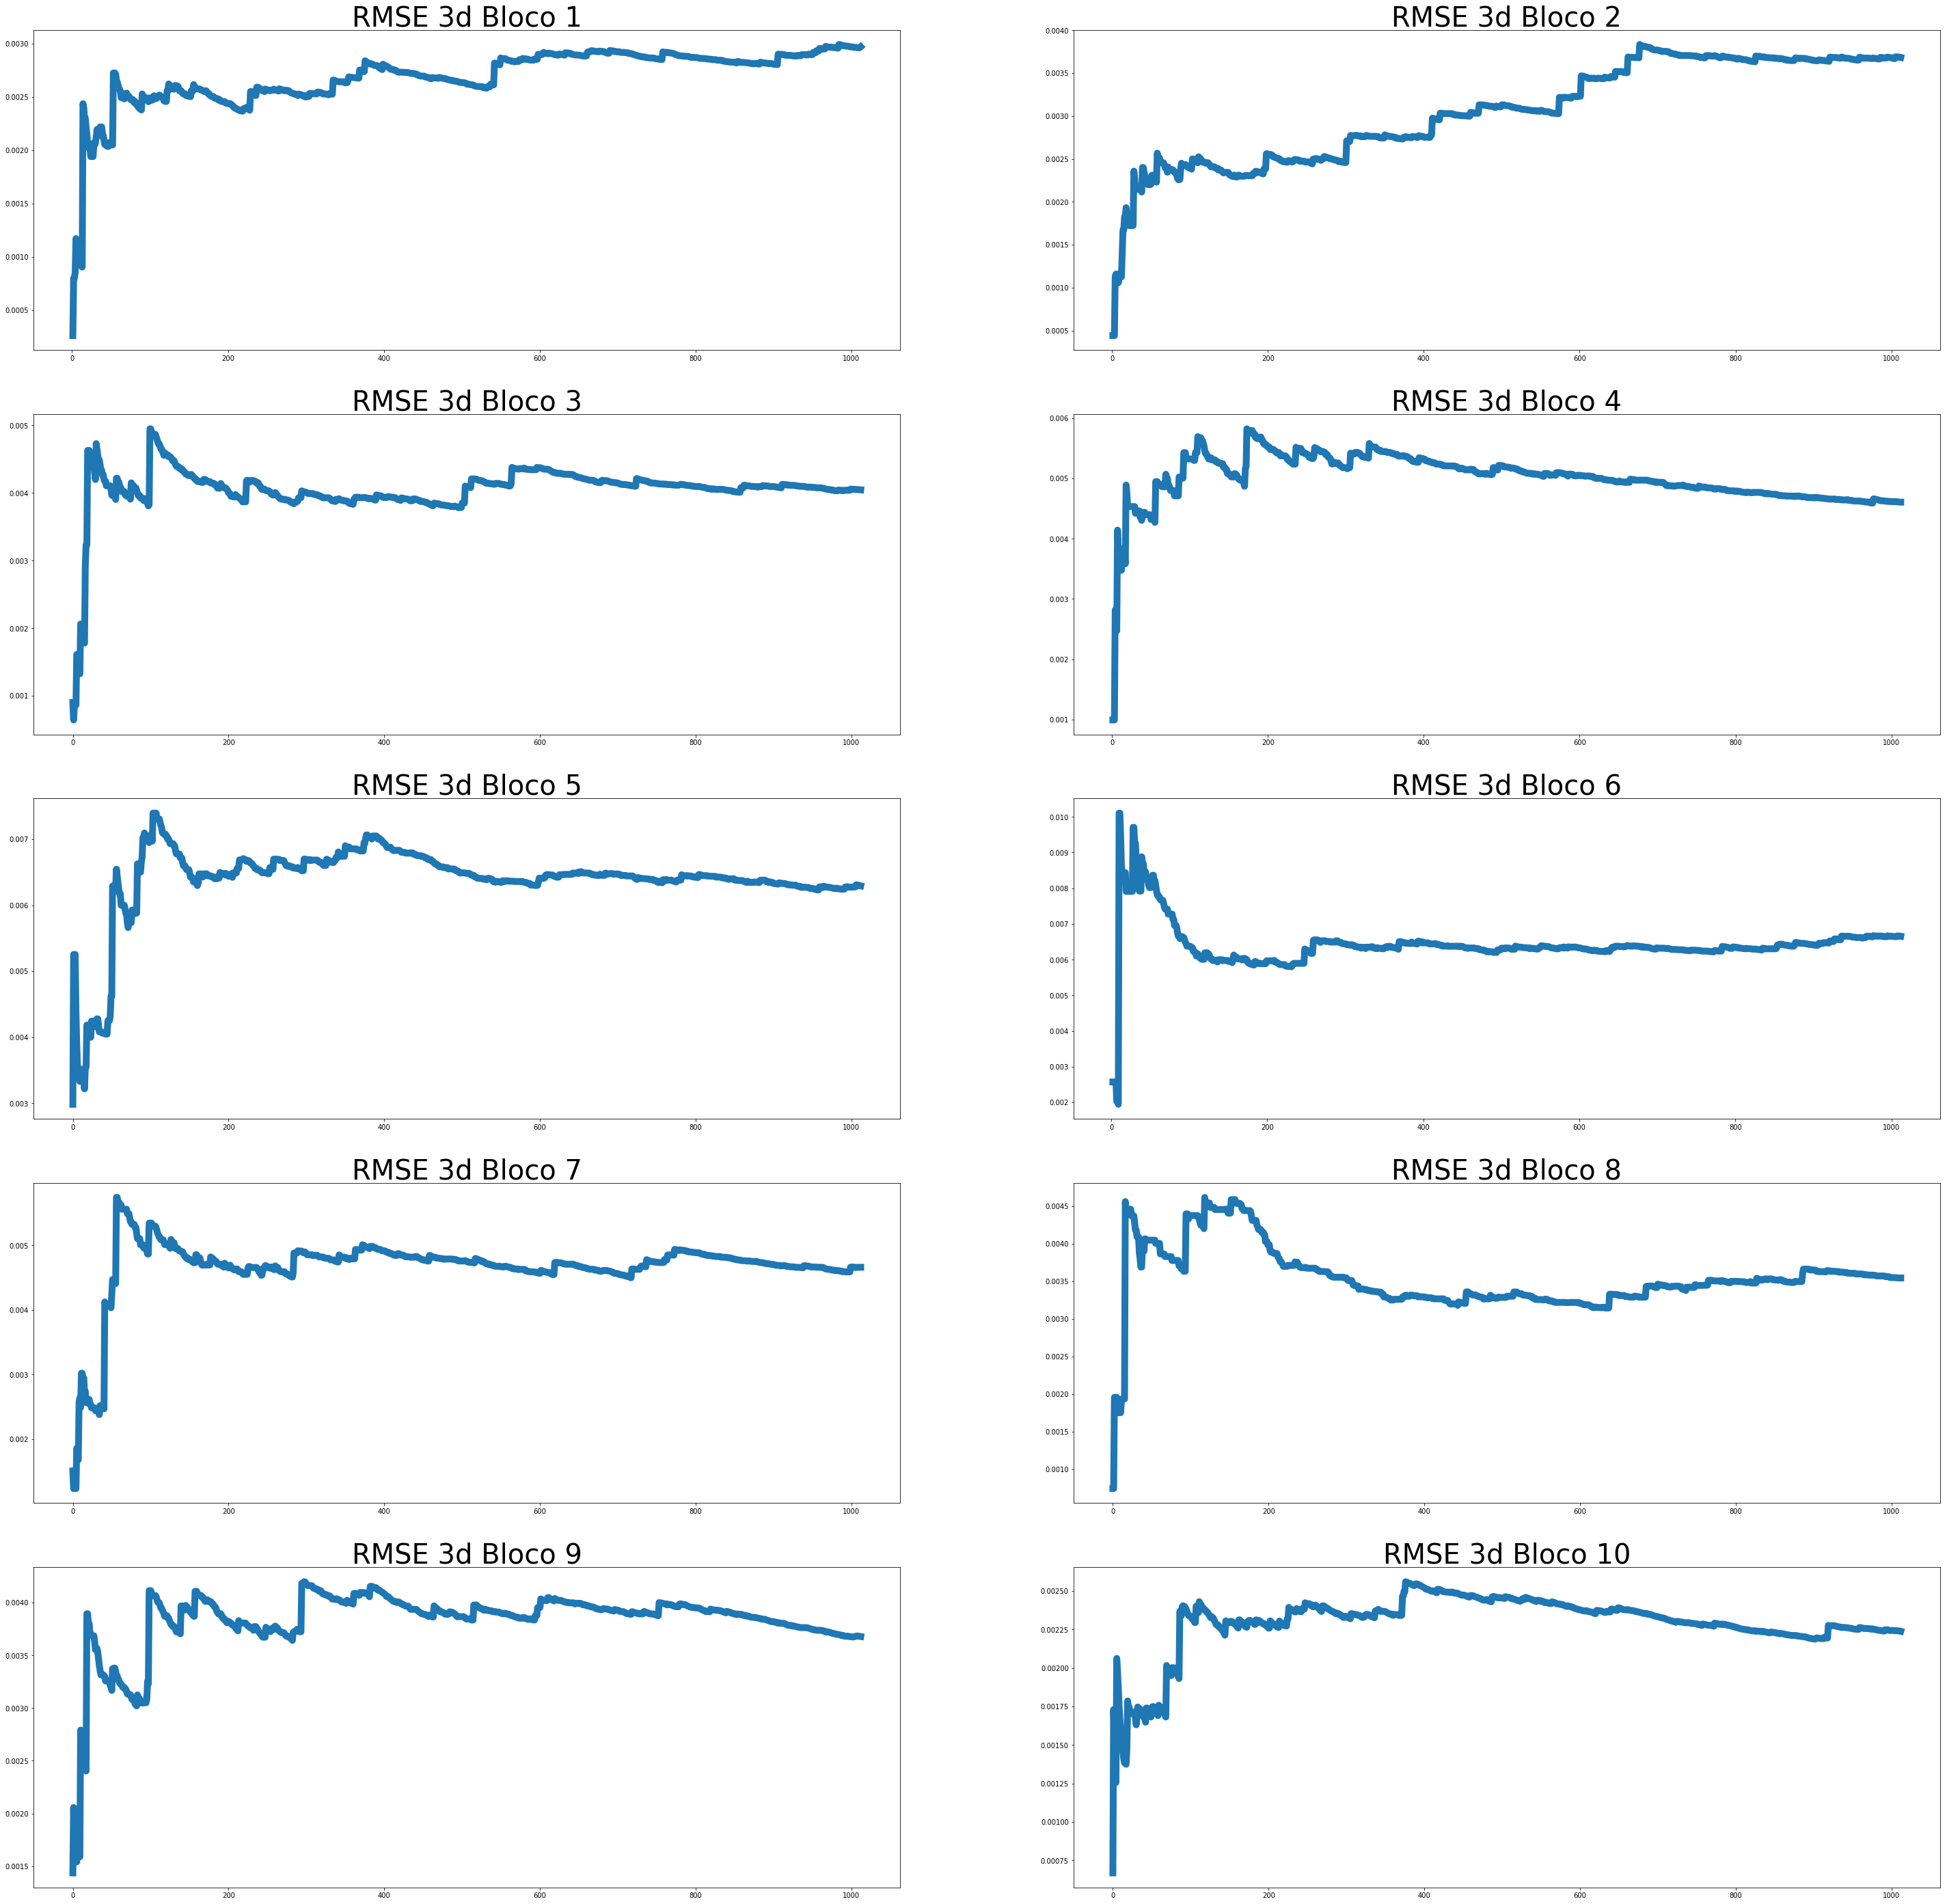

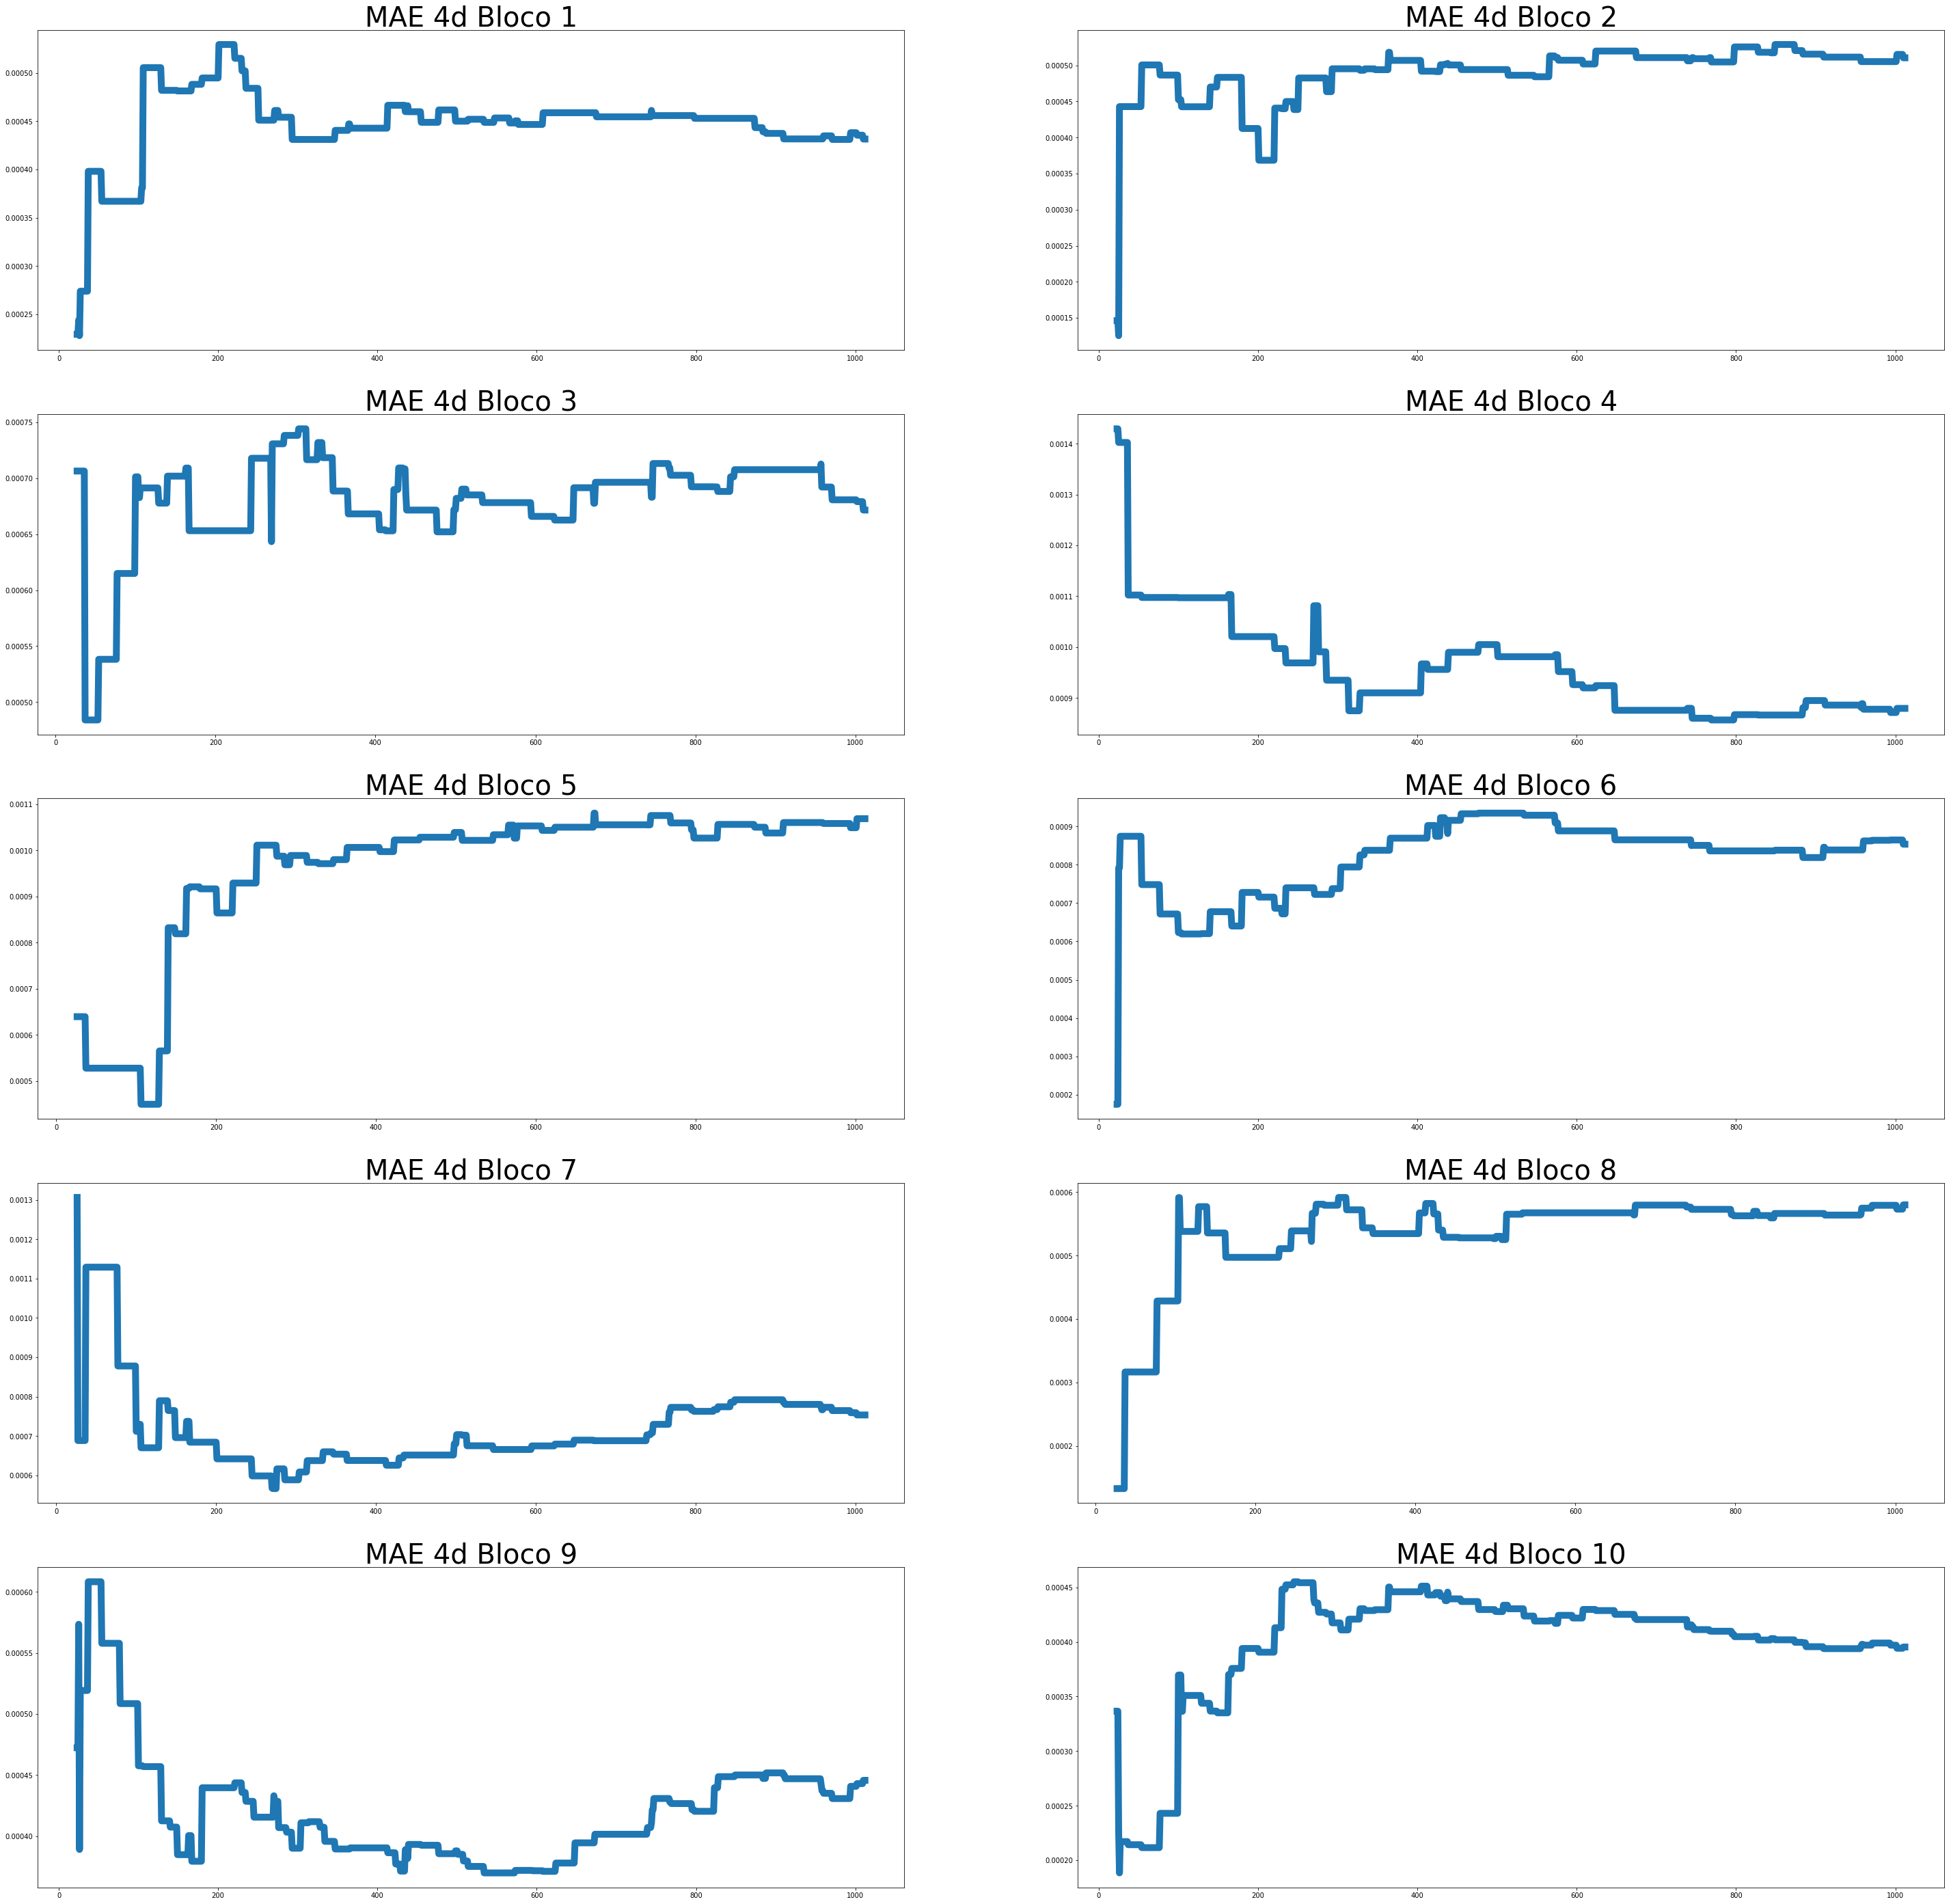

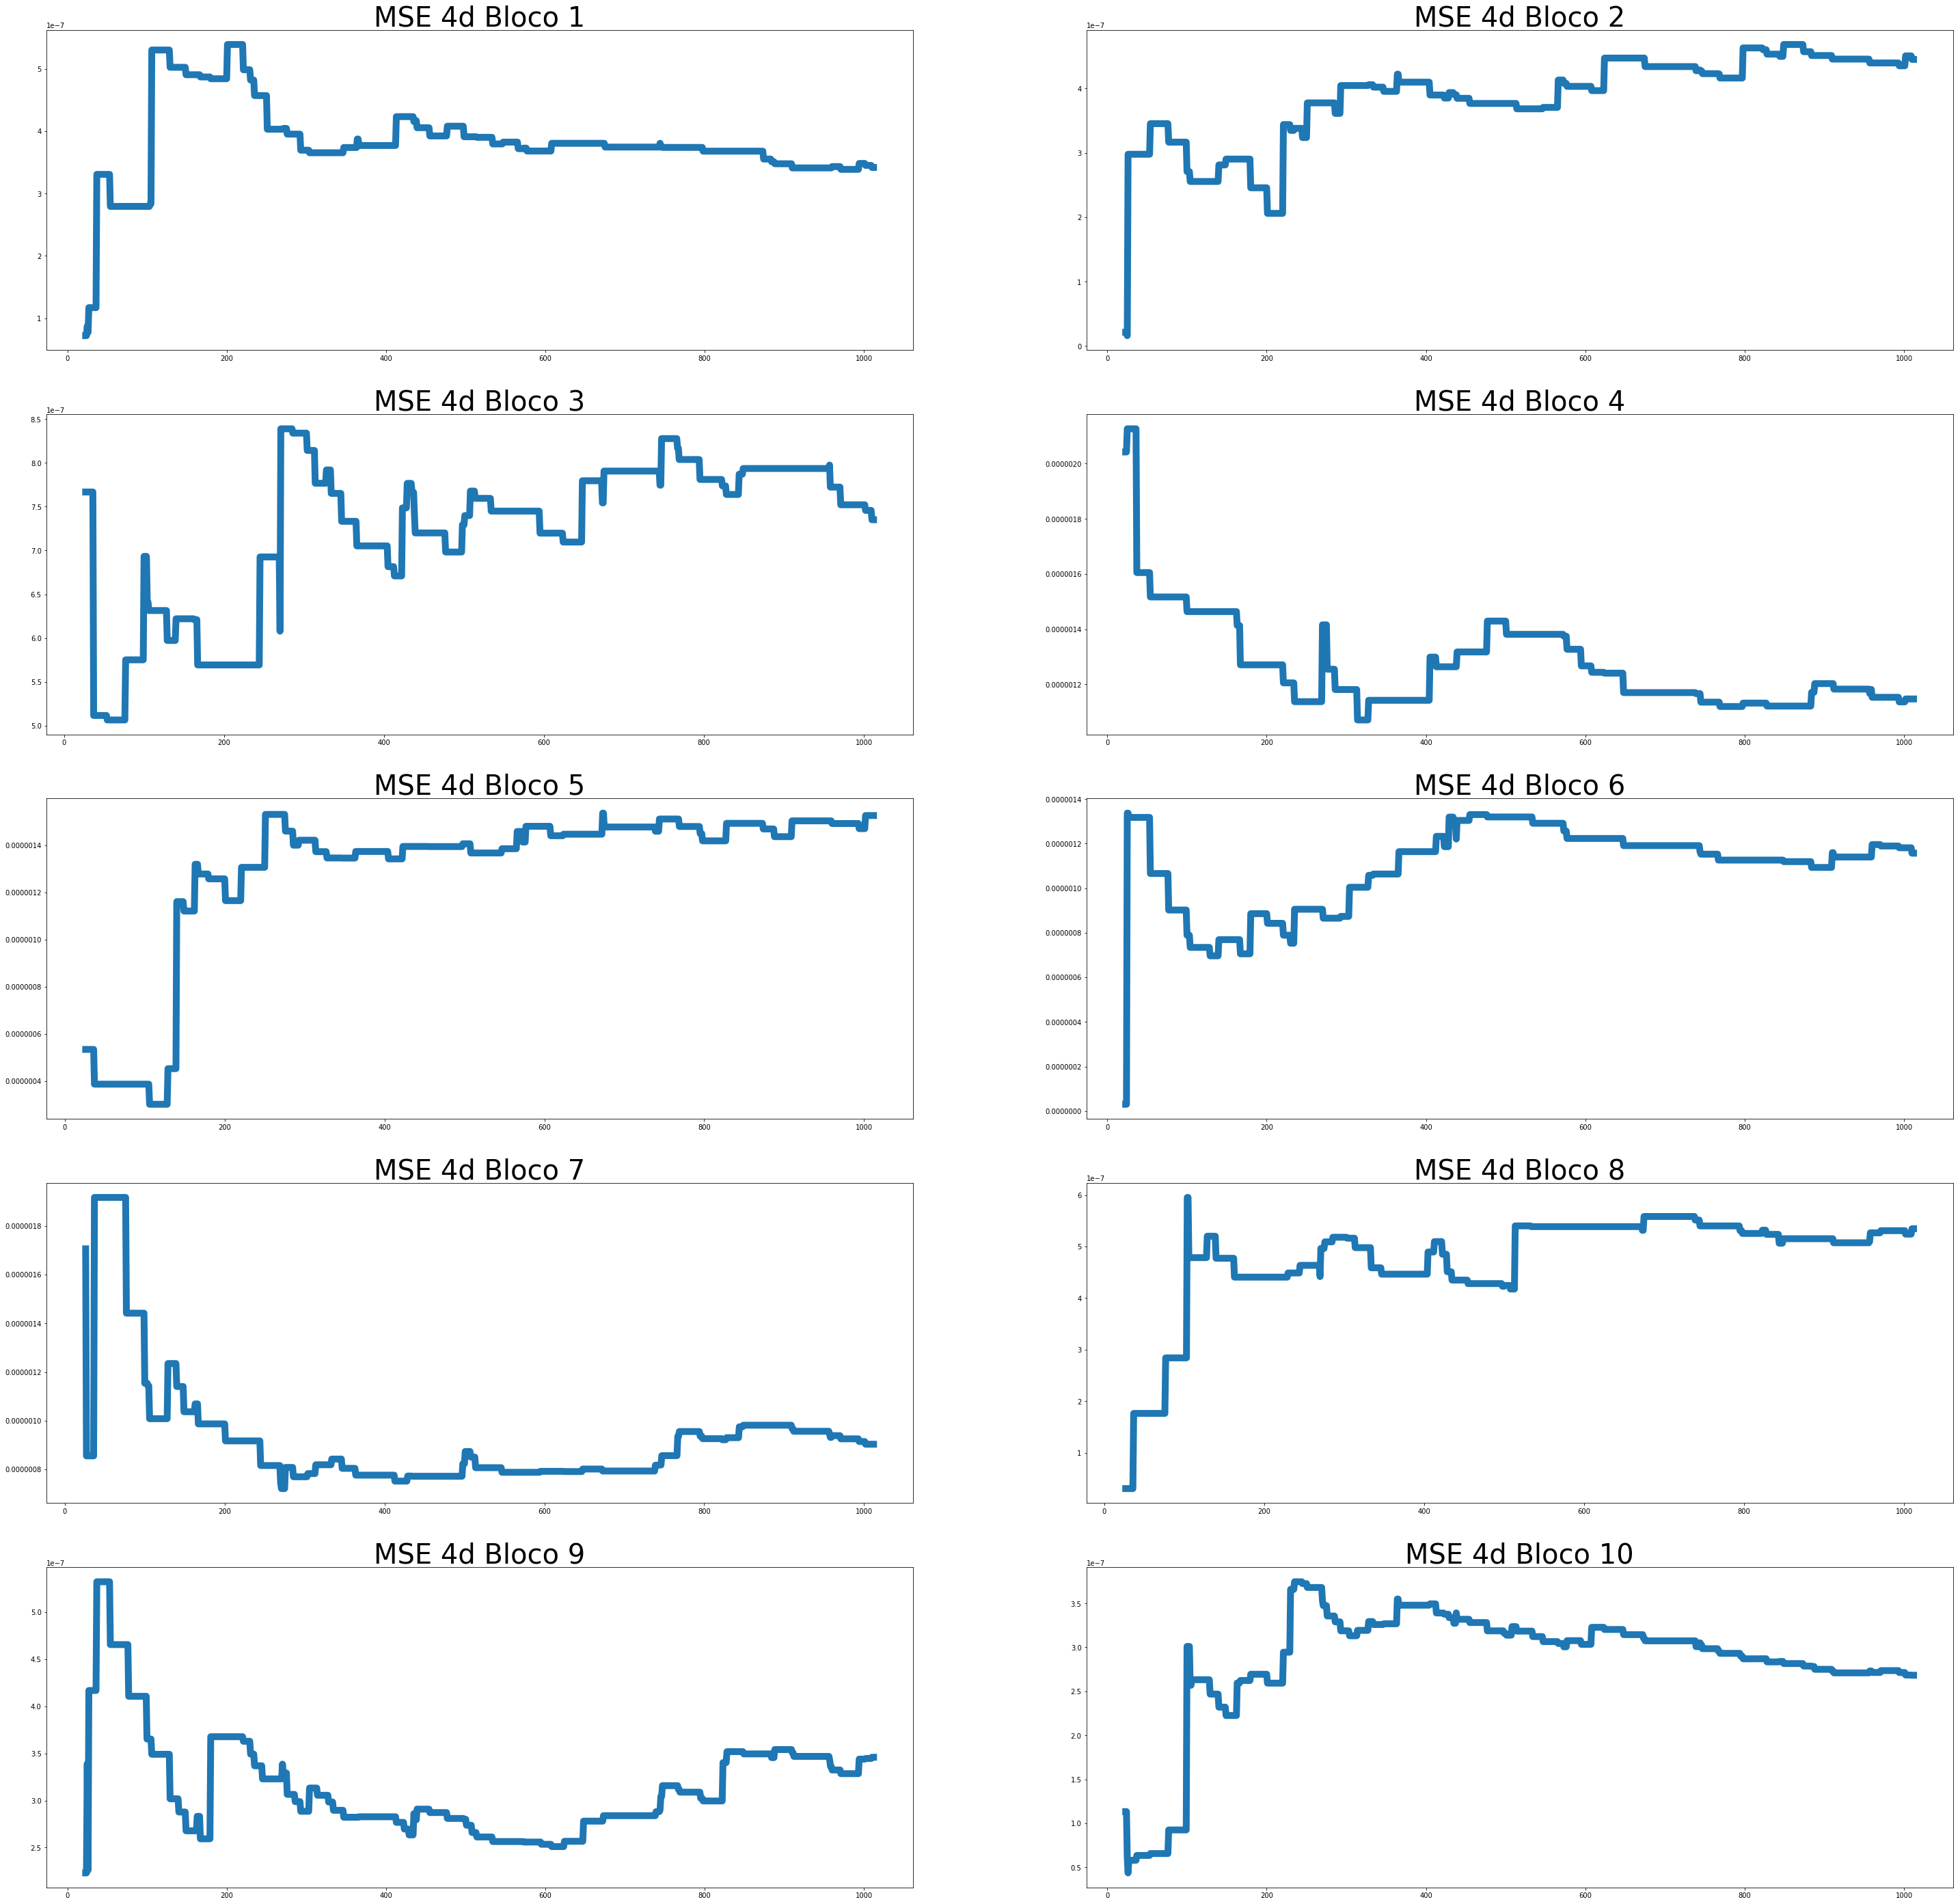

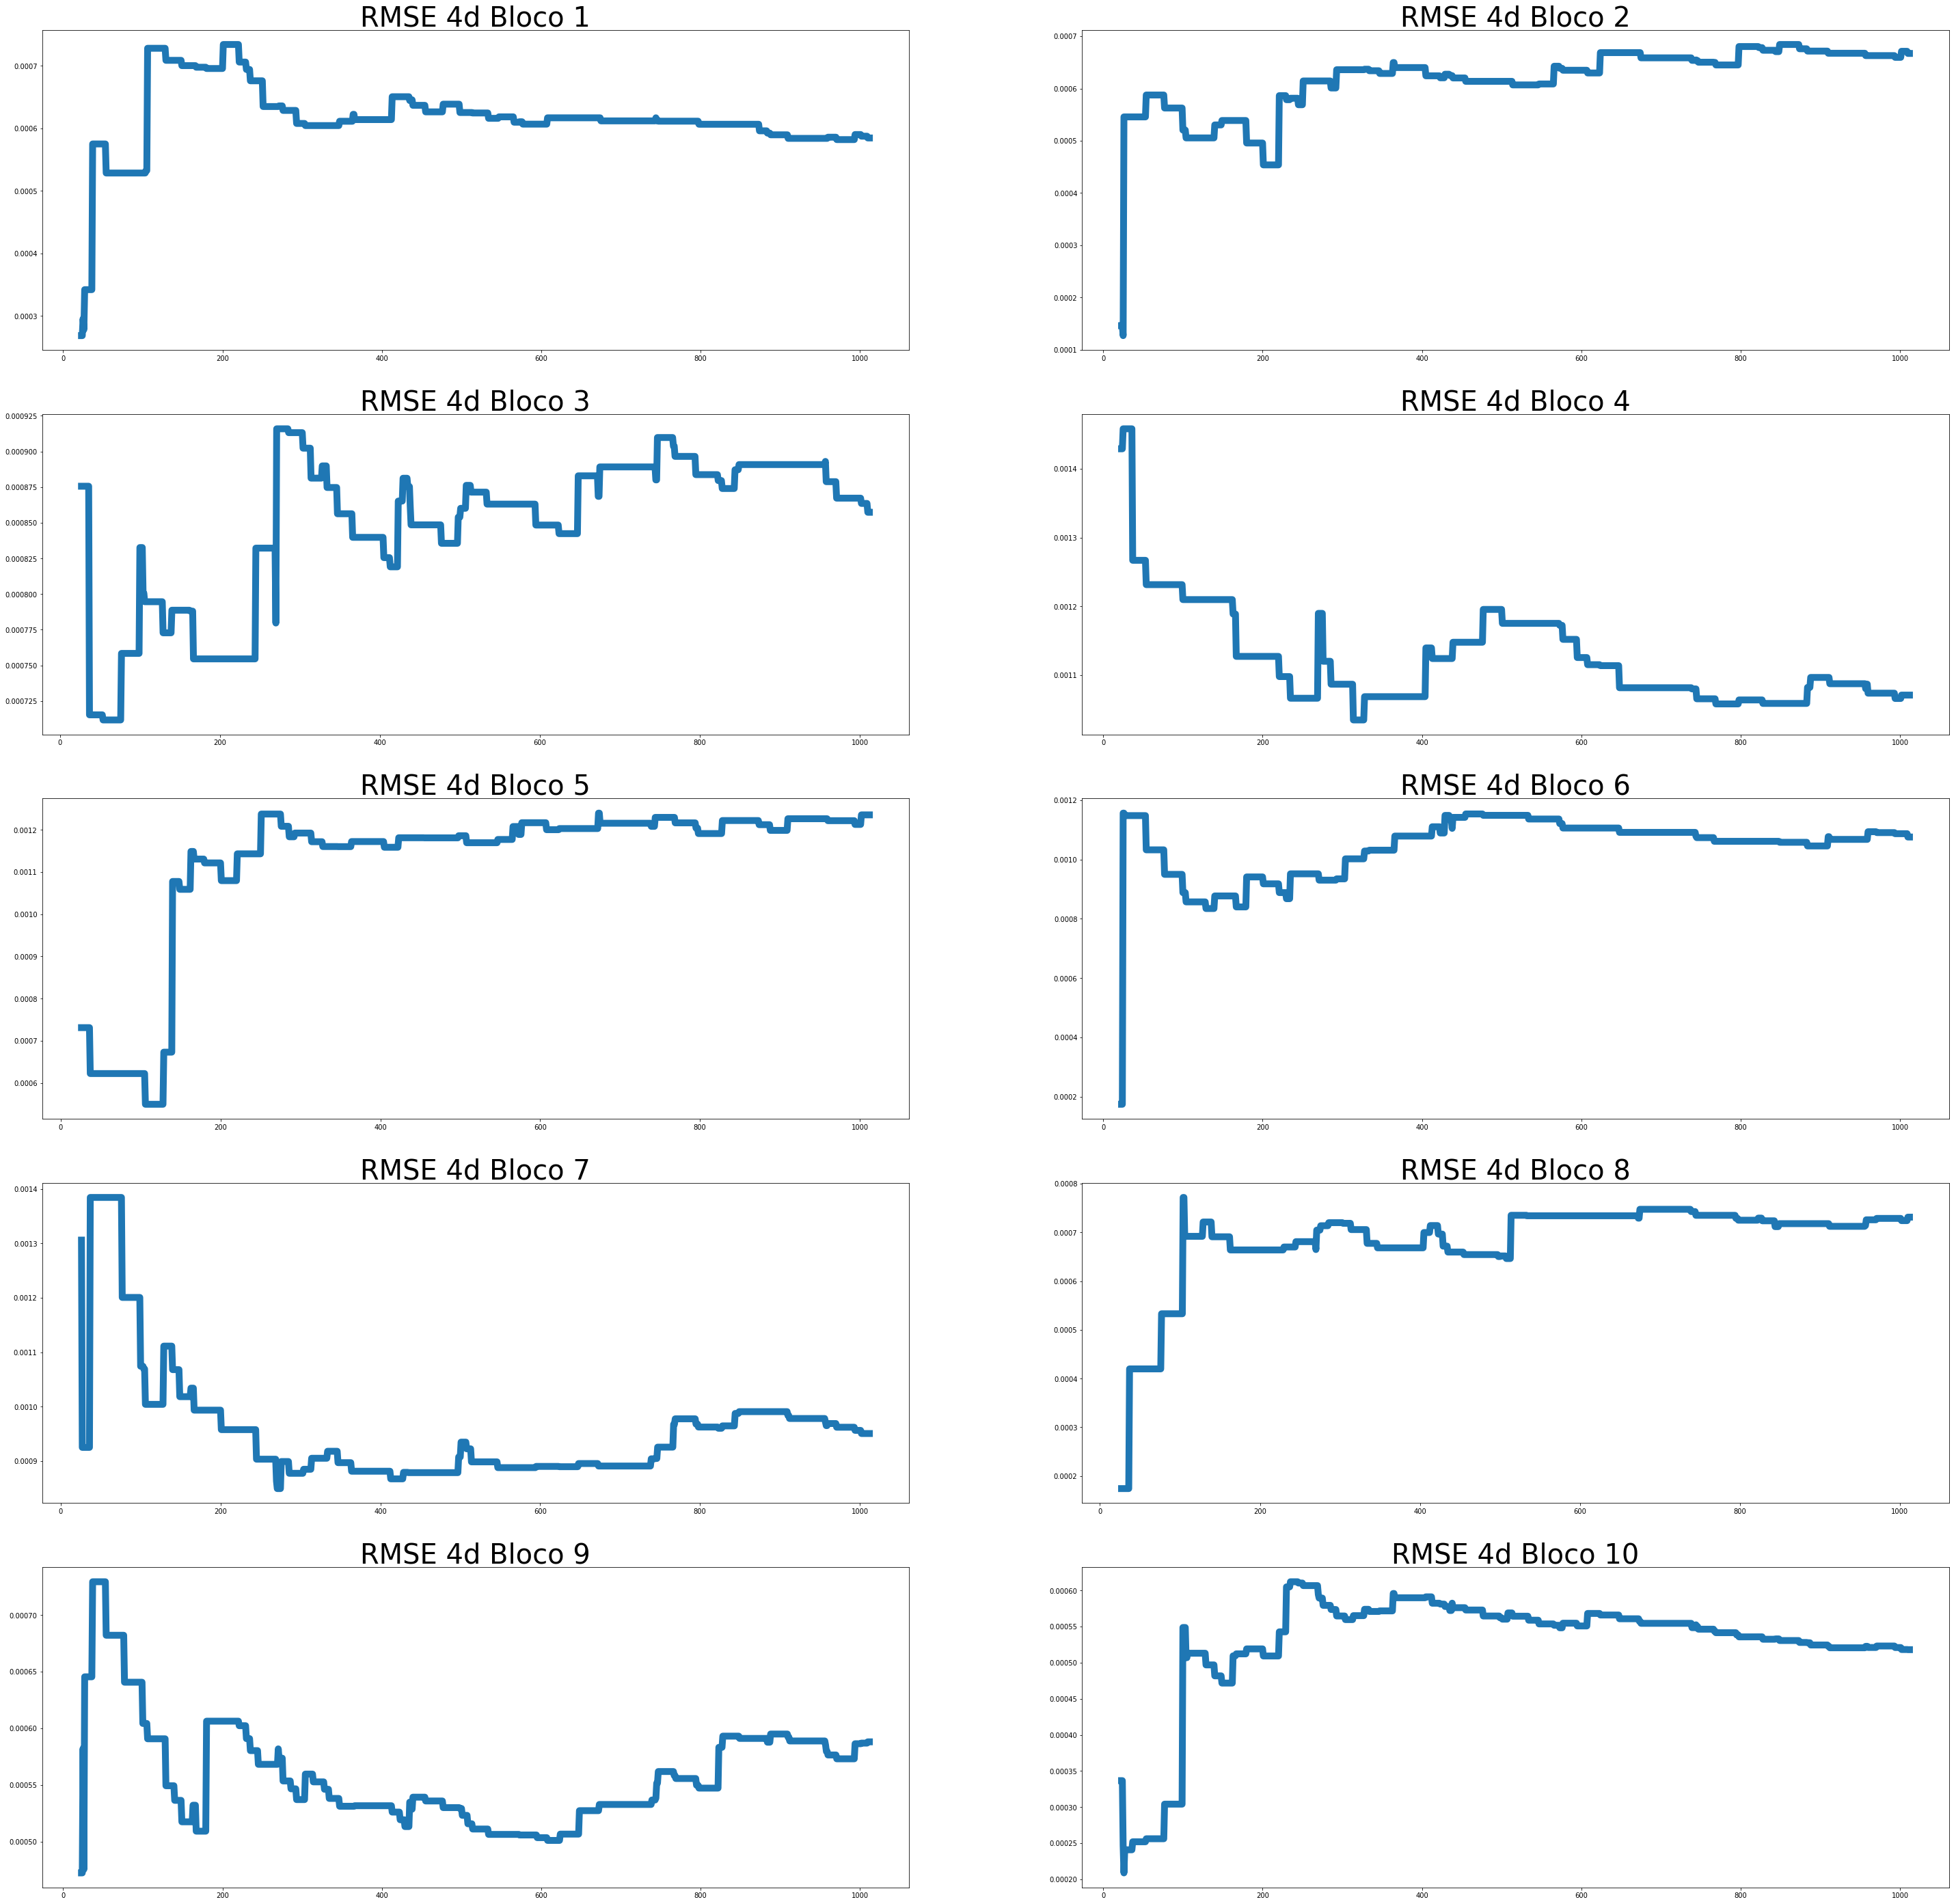

In [21]:
t=np.arange(len(MAE))


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSEc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE2Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE2Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 2d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE2Dc[:,i],linewidth=10)
plt.show()


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE3Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE3Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 3d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE3Dc[:,i],linewidth=10)
plt.show()


fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MAE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MAE4Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('MSE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, MSE4Dc[:,i],linewidth=10)
plt.show()

fig, ax = plt.subplots(figsize=(50, 50))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('RMSE 4d Bloco %d' %(i+1), fontsize=40)
    plt.plot(t, RMSE4Dc[:,i],linewidth=10)
plt.show()

ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS 



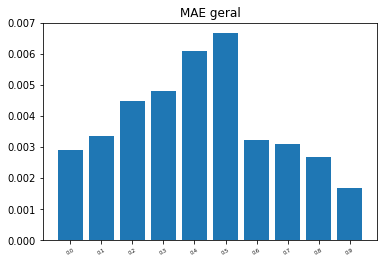

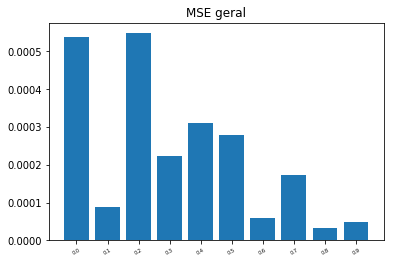

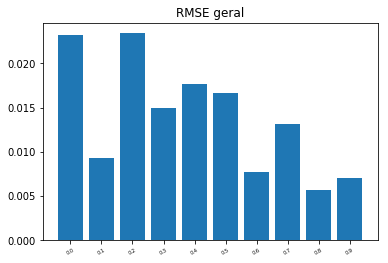


 
 ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL 



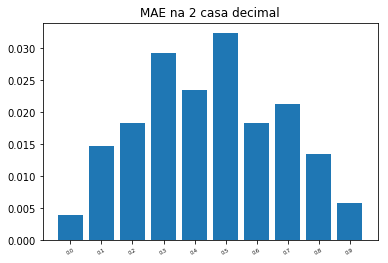

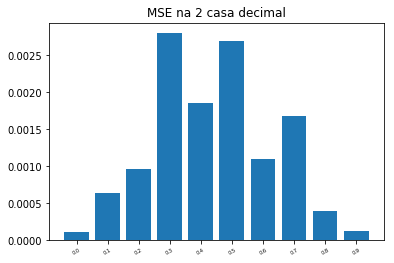

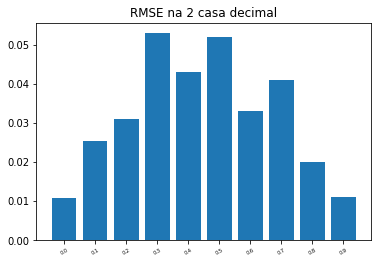


 
 ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL 



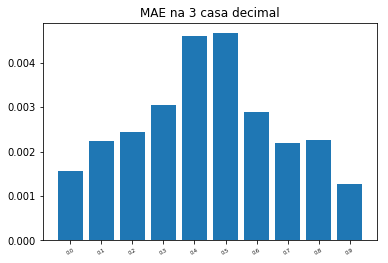

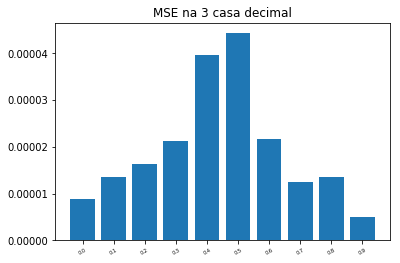

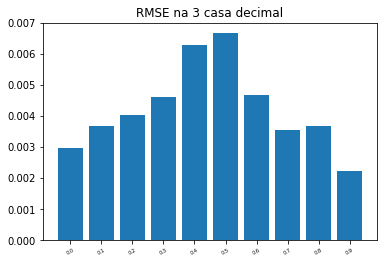


 
 ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL 



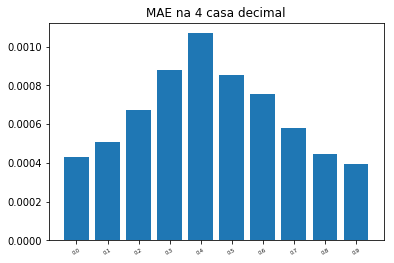

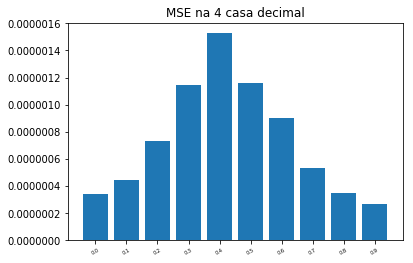

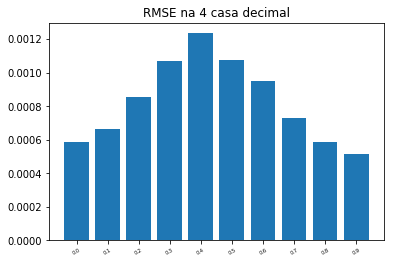

In [22]:
#------ ERROS GERAIS, DE CADA BLOCO

print('ERROS DOS 10 PRIMEIROS TERMOS, POR BLOCOS \n')



label = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


index = np.arange(len(MAE[-1]))
plt.bar(index, MAE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE geral')
plt.show()

index = np.arange(len(MSE[-1]))
plt.bar(index, MSE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE geral')
plt.show()



index = np.arange(len(RMSE[-1]))
plt.bar(index, RMSE[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE geral')
plt.show()

#------ ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL
print('\n \n ERROS PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA SEGUNDA CASA DECIMAL \n')


index = np.arange(len(MAE2D[-1]))
plt.bar(index, MAE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 2 casa decimal')
plt.show()

index = np.arange(len(MSE2D[-1]))
plt.bar(index, MSE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 2 casa decimal')
plt.show()


index = np.arange(len(RMSE[-1]))
plt.bar(index, RMSE2D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 2 casa decimal')
plt.show()
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA TERCEIRA CASA DECIMAL \n')

index = np.arange(len(MAE3D[-1]))
plt.bar(index, MAE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 3 casa decimal')
plt.show()



index = np.arange(len(MSE3D[-1]))
plt.bar(index, MSE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 3 casa decimal')
plt.show()



index = np.arange(len(RMSE3D[-1]))
plt.bar(index, RMSE3D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 3 casa decimal')
plt.show()
  
    
#------ ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL
print('\n \n ERROS GERAIS, PARA RMSE TOTAL (10 PRIMEIROS) NA ORDEM DA QUARTA CASA DECIMAL \n')



index = np.arange(len(MAE4D[-1]))
plt.bar(index, MAE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE na 4 casa decimal')
plt.show()


index = np.arange(len(MSE4D[-1]))
plt.bar(index, MSE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MSE na 4 casa decimal')
plt.show()


index = np.arange(len(RMSE4D[-1]))
plt.bar(index, RMSE4D[-1])
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE na 4 casa decimal')
plt.show()
